# Imports

In [269]:
import math
import inflection
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Image
import datetime as dt
from tabulate import tabulate
from scipy import stats
pd.set_option('display.max_columns', 500)

## Loading Data

In [2]:
                            # lê todo o arquivo de uma vez 
df_sales_raw = pd.read_csv("../data/train.csv", low_memory=False)
df_store_raw = pd.read_csv("../data/store.csv", low_memory=False)

# merge
df_raw = pd.merge(  df_sales_raw, df_store_raw, how='left', on='Store' )

In [3]:
df_raw.sample(20)
#Minha granularidade é: vendas por dia e por loja

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
405237,668,5,2014-07-04,8432,1100,1,1,0,0,c,a,1270.0,9.0,2010.0,0,NaN,NaN,NaN
731635,981,6,2013-09-14,5210,603,1,0,0,0,d,c,2620.0,11.0,2002.0,0,NaN,NaN,NaN
502415,336,1,2014-04-07,12883,1933,1,0,0,0,a,a,190.0,7.0,2014.0,0,NaN,NaN,NaN
173300,476,4,2015-02-26,4814,597,1,0,0,0,d,a,8300.0,9.0,2006.0,0,NaN,NaN,NaN
197100,861,4,2015-02-05,4377,603,1,1,0,0,c,c,740.0,NaN,NaN,1,14.0,2013.0,"Mar,Jun,Sept,Dec"
338304,10,6,2014-09-13,4601,468,1,0,0,0,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
250086,743,3,2014-12-17,5861,560,1,1,0,0,a,a,6710.0,11.0,2003.0,1,14.0,2012.0,"Jan,Apr,Jul,Oct"
313391,405,5,2014-10-10,5816,584,1,1,0,1,a,a,1080.0,4.0,2008.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
650183,924,2,2013-11-26,4725,478,1,0,0,0,a,a,6420.0,4.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
660721,312,6,2013-11-16,4557,454,1,0,0,0,d,a,11300.0,3.0,2012.0,0,NaN,NaN,NaN


# PASSO 1 - Data Description

In [4]:
# Meigarom faz uma cópia a cada seção nova, pra em grandes códigos evitar sobrescrever a var
# do DS original e ter que rodar tudo de novo.
df1 = df_raw.copy()

## Rename Columns

In [5]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [6]:
#pega as colunas originais
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

In [7]:
#cria função pra transformar em snake_case
snakecase = lambda x: inflection.underscore ( x )

#aplica a função em todas as palabras de cols_old, guarda em lista na cols_new
cols_new = list( map( snakecase, cols_old ) )

#rename
df1.columns = cols_new

In [8]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## Data Dimension

In [9]:
print (f'Number of rows: {df1.shape[0] }')
print (f'Number of rows: {df1.shape[1] }')

Number of rows: 1017209
Number of rows: 18


## Data Types

In [10]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [11]:
#convert 'date' to datetime:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## Check NA

In [12]:
# Ver todas linhas que tem ao menos 1 NA
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### Há 3 formas de tratar:
1 - Excluir todas as linhas com NA.
     - Bom: rápido e fácil
     - Péssimo: descarta dados, pode prejudicar meu modelo
    
2 - Usar algoritmos de ML pra substituir NAs pela média, mediana, prevendo o número que seria 
através das colunas que tem valor.

3 - Descobrir porque o NA tá aqui. Pode ter trocado o sistema, antes não tinha essa coluna. Ou ainda antes era o valor de outra coluna.

## Fillout NA

Colunas com NA:
-competition_distance
-competition_open_since_month
-competition_open_since_year
-promo2_since_week
-promo2_since_year
-promo_interval

In [13]:
#competition_distance
#CompetitionDistance - distance in meters to the nearest competitor store

# Vou assumir que os que não tem valor aqui, não tem competidores perto.
# Logo, vou atribuir pras NAs um valor bem amior que o maior valor de distância existente.
df1['competition_distance'].max()

75860.0

In [14]:
#atribuindo o valor pra todas NA

df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x ) 

In [15]:
#competition_open_since_month
# CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the
# nearest competitor was opened

# Se esta coluna está vazia, ou deve ser porque não tem competidor próximo, ou porque
# não sabem quando foi aberta. 
# Vou assumir nesse primeiro ciclo então minha data de venda como a data de abertura do 
# competidor, mesmo que seja simplista.

# precisa axis aqui pois são duas colunas que estamos mexendo no lambda
df1['competition_open_since_month'] = df1.apply ( lambda x: x['date'].month 
                    if math.isnan( x['competition_open_since_month'] ) 
                    else x['competition_open_since_month'], axis=1 ) 

In [16]:
#competition_open_since_year
# CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the
# nearest competitor was opened

# Vamos fazer pro year o mesno que o feito pro month:
df1['competition_open_since_year'] = df1.apply ( lambda x: x['date'].year 
                    if math.isnan( x['competition_open_since_year'] ) 
                    else x['competition_open_since_year'], axis=1 ) 

In [17]:
#promo2_since_week

# Promo2Since[Year/Week] - describes the year and calendar week when the store started 
#    participating in Promo2
#Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not
#    participating, 1 = store is participating

# promo2_since_week: Também vamos por hora setar a partir da data de venda
df1['promo2_since_week'] = df1.apply ( lambda x: x['date'].week 
                    if math.isnan( x['promo2_since_week'] ) 
                    else x['promo2_since_week'], axis=1 )

In [18]:
#promo2_since_year: Também vamos por hora setar a partir da data de venda
df1['promo2_since_year'] = df1.apply ( lambda x: x['date'].year 
                    if math.isnan( x['promo2_since_year'] ) 
                    else x['promo2_since_year'], axis=1 )

In [19]:
#promo_interval
# PromoInterval - describes the consecutive intervals Promo2 is started, naming the months 
# the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in 
# February, May, August, November of any given year for that store

#
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 
 9: 'Sept', 10: 'Out', 11: 'Nov', 12: 'Dec' }

#preencher NA com zeros
#inplace=True pra não retornar valor, mas modificar na coluna
df1['promo_interval'].fillna(0, inplace=True)

#cria coluna 'month_map' e seta o mes nela
df1['month_map'] = df1['date'].dt.month.map( month_map )

#cria coluna 'is_promo', e seta 1 se 'month_map' estiver em 'promo_interval', senão 0.
#assim, consigo saber se naquela venda, estava ou não em promoção.
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply ( lambda x: 
      0 if x['promo_interval'] == 0 else 
      1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis =1 )

In [20]:
 df1.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
123610,961,7,2015-04-12,0,0,0,0,0,0,d,c,9430.0,4.0,2015.0,0,15.0,2015.0,0,Apr,0
228582,8,3,2015-01-07,7262,781,1,1,0,0,a,a,7520.0,10.0,2014.0,0,2.0,2015.0,0,Jan,0
37392,598,7,2015-06-28,0,0,0,0,0,0,c,a,550.0,12.0,2013.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",Jun,0
840104,180,6,2013-06-08,6654,878,1,0,0,0,d,a,5800.0,9.0,2010.0,0,23.0,2013.0,0,Jun,0
554815,331,3,2014-02-19,7575,989,1,1,0,0,a,c,670.0,2.0,2014.0,1,14.0,2015.0,"Jan,Apr,Jul,Oct",Feb,0


In [21]:
 df1.sample(5).T

,483739,398379,278513,294364,230093
store,615,300,69,16,404
day_of_week,4,5,7,4,2
date,2014-04-24 00:00:00,2014-07-11 00:00:00,2014-11-16 00:00:00,2014-10-30 00:00:00,2015-01-06 00:00:00
sales,7931,7124,0,7122,0
customers,1182,844,0,847,0
open,1,1,0,1,0
promo,0,0,0,0,1
state_holiday,0,0,0,0,a
school_holiday,1,0,0,1,0
store_type,d,a,c,a,a


In [22]:
#resolvido
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## Change Types

In [23]:
# Como fizemos alteração nas colunas, é importante conferir se não mudou o formato das colnas
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [24]:
#converter de float pra int
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )
df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

In [25]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [26]:
df1.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
523959,695,3,2014-03-19,5828,559,1,1,0,0,a,a,550.0,7,2011,1,1,2012,"Jan,Apr,Jul,Oct",Mar,0
818304,680,5,2013-06-28,5483,823,1,0,0,1,c,a,170.0,6,2013,1,35,2012,"Mar,Jun,Sept,Dec",Jun,1
229819,130,2,2015-01-06,5105,582,1,1,0,1,c,a,900.0,1,2015,1,13,2010,"Jan,Apr,Jul,Oct",Jan,1
164885,981,5,2015-03-06,8777,879,1,1,0,0,d,c,2620.0,11,2002,0,10,2015,0,Mar,0
564239,835,2,2014-02-11,3822,598,1,0,0,0,a,a,2890.0,12,2007,1,10,2014,"Mar,Jun,Sept,Dec",Feb,0


## Descriptive Statistical

Serve para 2 coisas:
 - 1  Termos alguma noção de negócios pelos dados
 - 2  Conseguirmos detectar alguns erros (venda negativa por ex..)

Métricas de tendência central: média e mediana (resumem dados em um único número)

Metricas de dispersão: desvio padrão, min, max, range, skew, kurtosis

In [27]:
#separa colunas numéricas e categóricas, pra aplicar a estatística em cada conjunto:
num_attributes = df1.select_dtypes ( include=['int64','float64'] )
cat_attributes = df1.select_dtypes ( exclude=['int64','float64','datetime64[ns]'] )

In [28]:
num_attributes.sample(5)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
264130,764,2,4851,480,1,1,0,26490.0,12,2014,1,10,2014,1
126964,970,4,2770,363,1,0,1,910.0,12,2014,1,37,2009,1
240892,928,6,6220,584,1,0,0,1090.0,12,2014,1,31,2013,0
446251,1037,3,6279,824,1,0,0,150.0,5,2014,0,22,2014,0
468176,662,4,9138,706,1,1,0,1070.0,5,2014,0,19,2014,0


In [29]:
cat_attributes.sample(5)

,state_holiday,store_type,assortment,promo_interval,month_map
656650,0,d,a,"Jan,Apr,Jul,Oct",Nov
214330,0,a,c,0,Jan
685742,0,d,a,"Mar,Jun,Sept,Dec",Out
926949,0,a,a,0,Mar
611518,0,d,a,"Feb,May,Aug,Nov",Dec


### Numerical Attibures

In [30]:
#Métricas de tendência central: média e mediana
ct1 = pd.DataFrame ( num_attributes.apply ( np.mean ) ).T
ct2 = pd.DataFrame ( num_attributes.apply ( np.median ) ).T

#Metricas de dispersão: desvio padrão, min, max, range, skew, kurtosis
d1 = pd.DataFrame ( num_attributes.apply ( np.std ) ).T
d2 = pd.DataFrame ( num_attributes.apply ( min ) ).T
d3 = pd.DataFrame ( num_attributes.apply ( max ) ).T
d4 = pd.DataFrame ( num_attributes.apply ( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame ( num_attributes.apply ( lambda x: x.skew() ) ).T
d6 = pd.DataFrame ( num_attributes.apply ( lambda x: x.kurtosis() ) ).T

#concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index() 
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ]

In [31]:
#Análise geral:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


In [32]:
#Anlálise de SALES

#Vou retirar as vendas = 0 pra analisar o gráfico mais limpo:
df_sales_pos = df1.loc[ df1['sales'] > 0 ]

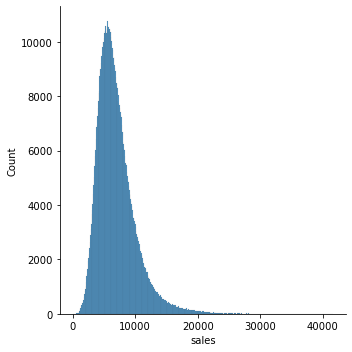

In [33]:
p = sns.displot ( df_sales_pos['sales'] )
#p.fig.set_dpi(100)
plt.show()

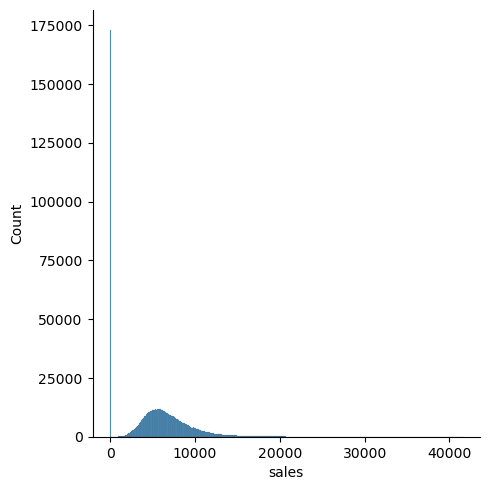

In [34]:
#Abaixo, ploto o gráfico do Sales original, porque o m que estou analistando 
# considera os zeros nas vendas também!
p = sns.displot ( df1['sales'] )
p.fig.set_dpi(100)
plt.show()

ANÁLISE SALES:

- Média e mediana bem próximas, não vai ter deslocamento da distribuição muito grande, vide skew.
- Skew 0.6 positivo (deslocamento leve para esquerda), mas bem próximo a zero, logo distribuição bem próxima de uma normal. 
- Kurtosis 1.77 positiva, próxima de 2, tem um pico grande.
- A média é de 5773 vendas/dia, e o std de 3850: Isto significa que em 78% dos dias (±1 std), temos entre 1923 (5773-3850) e 9.623 (5773+3850) vendas.

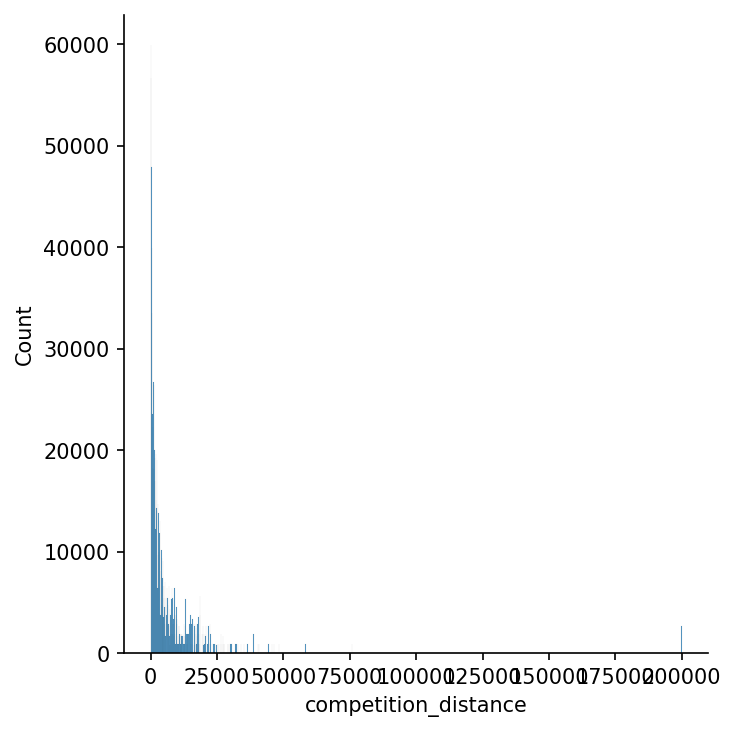

In [35]:
#Análise competition distance
p = sns.displot ( df1['competition_distance'] )
p.fig.set_dpi(150)
plt.show()

ANÁLISE COMPETITION DISTANDE:(apenas > 0):

- Média e mediana bem longe uma da outra, logo vai ter deslocamento da normal muito grande, 
vide skew.
- Skew 10.2 positiva (deslocamento enorme pra esquerda), indicando grande concentração de 
distâncias menores até os concorrentes.
- Kurtosis 147 positiva, indicando um pico gigantesco.

In [36]:
#Análise customers
#Vou retirar customers = 0 pra analisar o gráfico mais limpo:

df_cust_pos = df1.loc[ df1['customers'] > 0 ]

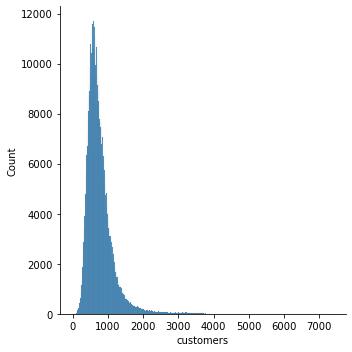

In [37]:
p = sns.displot ( df_cust_pos['customers'] )
#p.fig.set_dpi(150)
plt.show()

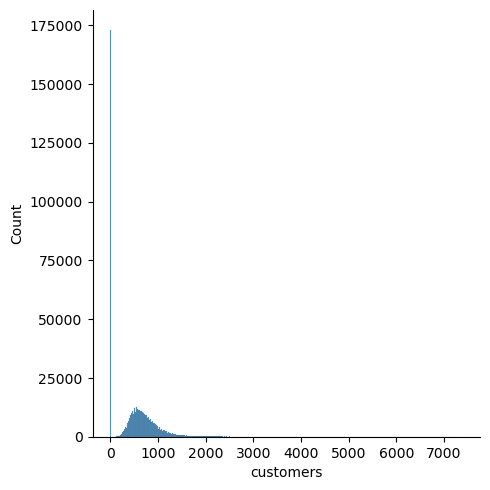

In [38]:
#Abaixo, ploto o gráfico do Customer original, porque o m que estou analistando 
# considera os zeros nos customers também!
p = sns.displot ( df1['customers'] )
p.fig.set_dpi(100)
plt.show()

ANÁLISE CUSTOMERS:

- Média (633) e mediana (609) próximas, mas mediana menor: deslocamento da curva levemente pra esquerda.

- Logo, skew levemente positiva, indicando maior concentração dos valores mais abaixo da média (ponto central).

- Kursosis de 7, logo pico muito alto /distribuição bem dispersa em número de clientes por dia.

- Std de 464, e média de clientes por dia de 633: em 78% dos dias (34% ref. 1 std positivo + 34% ref. 1 std negativo), tivemos entre 169 (633-464) e 1097 (633+464) clientes. 



In [39]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


### Categorical Attibures

In [40]:
cat_attributes.apply ( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

In [41]:
df1['state_holiday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: state_holiday, dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

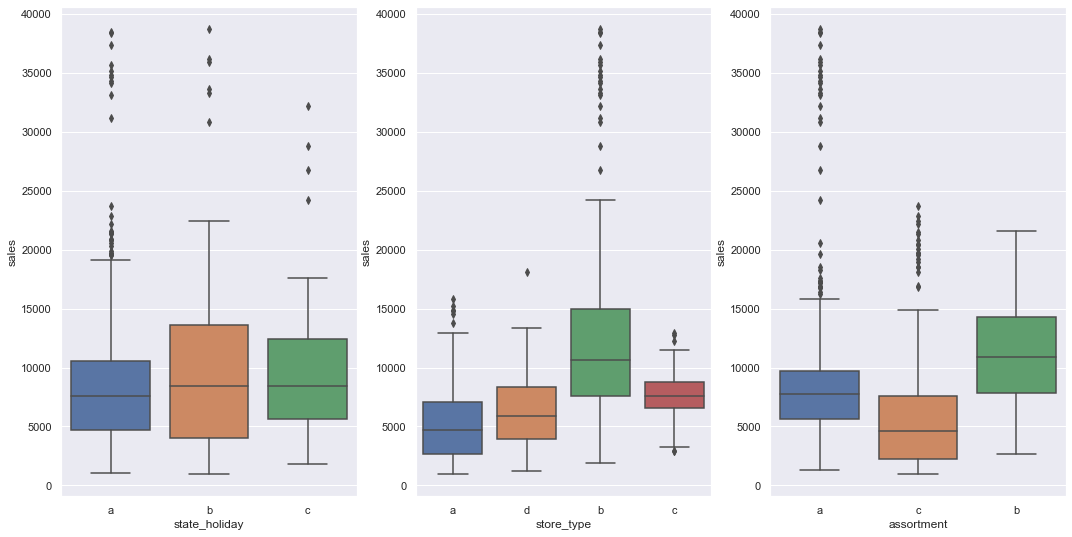

In [42]:
#Boxplot tem todas as medidas de dispersão e tendência central. Vamos usar ele.

#vendas nos feriados: remover dias não feriado e dias onde não teve vendas 
aux1 = df1[ (df1['state_holiday'] != '0') & (df1['sales'] > 0) ]

#setar tamanho:
sns.set(rc={'figure.figsize':(18,9)})

plt.subplot (1, 3, 1)
sns.boxplot( x='state_holiday', y='sales', data=aux1 )

plt.subplot (1, 3, 2)
sns.boxplot( x='store_type', y='sales', data=aux1 )

plt.subplot (1, 3, 3)
sns.boxplot( x='assortment', y='sales', data=aux1 )

Acima, a linha meio de cada imagem colorida é o 50º quartil, ou seja a mediana.
A borda da figura de baixo é o quartil 25, a de cima o 75.
Logo, dentro da imagem laranja, tenho o volume do quartil 25 ao 50, e do 50 ao 75. 
Fora da figura até os riscos superior e inferior é o valor mínimo e máximo.
Pontos após os riscos das bordas (valores máximos) são outliers: > 3 vezes o desvio padrão.

Logo, quanto mais achatada é a figura, maior a concentração em torno da mediana.

Análise do boxplot 1 - quantidade de vendas por tipo de feriado:

Legenda state_holiday: a = public holiday | b = Easter holiday |  c = Christmas

-A mediana de vendas de páscoa(b) e natal (c) é mais alta que de feriados publicos (a).

-A mediana de vendas de páscoa(b) e natal (c) é parecida, mas a dispersão é maior na páscoa.

Análise do boxplot 2 - quantidade de vendas por tipo de loja:
 
Legenda de StoreType - differentiates between 4 different store models: a, b, c, d
        
-Loja tipo b vende muito mais na mediana que as demais, aprox. o dobro da tipo a.

-Loja do tipo c tem concentração de vendas maior em torno da mediana.

Análise do boxplot 3 - quantidade de vendas por mix de produtos:

Legenda de Assortment - describes an assortment level: a = basic, b = extra, c = extended
        
-Há muito mais vendas do mix b do que dos demais. E o número de vendas varia mais também
neste mix.

-O mix A tem uma grande quantidade de outliers, mas uma distribuição bem uniforme fora isto.

In [66]:
#Save CSV:
df1.to_csv('1_data_description_done.csv', index=False) #index=False if I have first columns as index, to avoid saving with the unnamed:0. Don't save the index, and won't have column unnamed:0 created nor problem to load it.
#no import needed, no message will appear.

# PASSO 2 - Feature Engeneering

In [53]:
df2 = df1.copy()

In [54]:
df2.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,31,2015,0,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,31,2015,0,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,31,2015,0,Jul,0


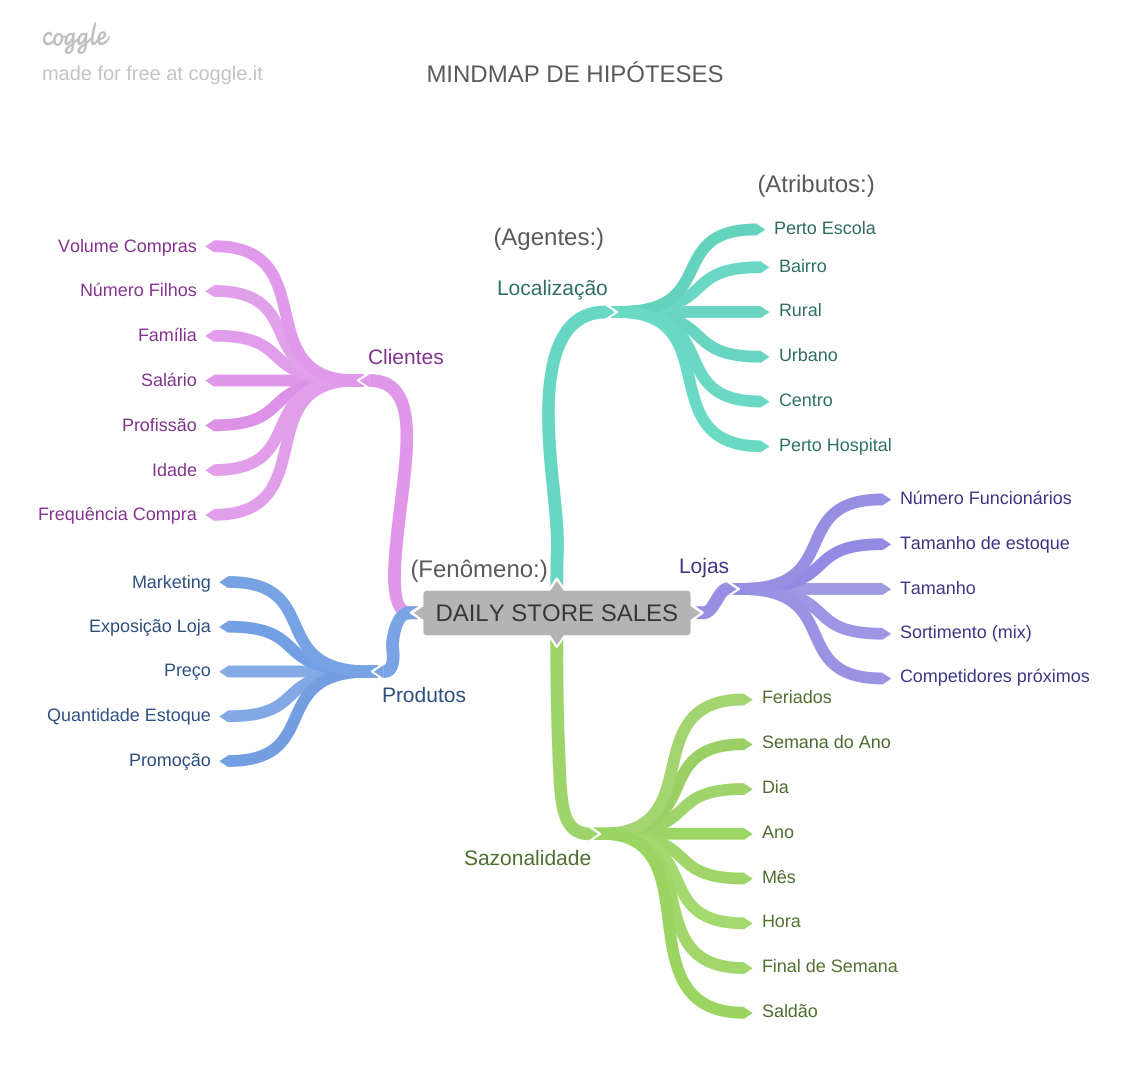

In [55]:
Image ('../img/MindMapHypothesis.png')

## Criação das Hipóteses

Hipóteses são Apostas.

Exemplos nesse contexto são:
- Lojas de MAIOR porte (atributo) deveriam vender (fenômeno) MAIS.
- Lojas com MAIOR sortimento (atributo) deveriam vender (fenômeno) MAIS.
- Lojas com MAIS competidores por perto (atributo) deveriam vender (fenômeno) MENOS.

Vamos agora criar hipóteses olhando para o mapa, relacionando o fenômeno e cada agente 
 e seus atributos:
        Na prática, isto é capturado em reunião de brainstorm com o time de negócio.
        Deixar claro que são apostas, e não são relações de causa e efeito, mas correlações:
            Isto porque estamos mapeando todos os atributos correlacionados com vendas, 
            e não há um único.

### Hipóteses Loja

#### Lojas com maior quadro de funcionários deveriam vender mais.

#### Lojas com maior estoque deveriam vender mais.

#### Lojas com maior porte deveriam vender mais.

#### Lojas com maior sortimento deveriam vender mais.

#### Lojas com competidores mais próximos deveriam vender menos.


#### Lojas com competidores à mais tempo deveriam vender mais.

### Hipóteses Produto

#### Lojas que investem mais em marketing deveriam vender mais.

#### Lojas com maior exposição de produto nas vitrines deveriam vender mais.

#### Lojas com produtos de preço menor deveriam vender mais.

#### Lojas com promoções mais agressivas (descontos maiores), deveriam vender mais.

#### Lojas com promoções ativas por mais tempo deveriam vender mais.

#### Lojas com mais dias de promoção deveriam vender mais.

#### Lojas com mais promoções consecutivas deveriam vender mais.

### Hipóteses Sazonalidade

#### Lojas abertas duantes o feriado de natal deveriam vender mais.

#### Lojas deveriam vender mais ao longo dos anos.

#### Lojas deveriam vender no segundo semestre do ano.

#### Lojas deveriam vender mais no dia 10 de cada mês.

#### Lojas deveriam vender menos aos finais de semana.

#### Lojas deveriam vender menos durante os feriados escolares.

## Lista Final de Hipóteses (priorização)

Critério: tenho ou não o dado disponível agora?
    Se tenho, vou priorizar neste primeiro ciclo (listadas abaixo).
    Se não tenho, num ciclo futuro se necessário avalio coletar, conforme a performance do modelo.
    
   Cada hipótese vai gerar tabela, gráfico pra poder avaliar correlação com o fenômeno, como a força dessa correlação.

#### (H1 - loja) Lojas com maior sortimento deveriam vender mais.

#### (H2 - loja) Lojas com competidores mais próximos deveriam vender menos.


#### (H3 - loja) Lojas com competidores à mais tempo deveriam vender mais.

#### (H4 - prod) Lojas com promoções ativas por mais tempo deveriam vender mais.

#### (H5 - prod) Lojas com mais dias de promoção deveriam vender mais.

#### (H6 - prod) Lojas com mais promoções consecutivas deveriam vender mais.

#### (H7 - sazo) Lojas abertas duantes o feriado de natal deveriam vender mais.

#### (H8 - sazo) Lojas deveriam vender mais ao longo dos anos.

#### (H9 - sazo) Lojas deveriam vender mais no segundo semestre do ano.

#### (H10 - sazo) Lojas deveriam vender mais depois do dia 10 de cada mês.

#### (H11 - sazo) Lojas deveriam vender menos aos finais de semana.

#### (H12 - sazo) Lojas deveriam vender menos durante os feriados escolares.

## Feature Engeneering

Aqui, vou criar as variáveis que preciso derivar pra depois validar as hipóteses:

-year
-Month
-day
-week_of_year
-year_week

-competition_since - da data da compra, há quanto tempo tenho competidores
    juntar: competition_open_since_month + competition_open_since_year e pegar a diferença até date.

-promo_since - desde quando tenho a promoção ativa
    tenho promo2_since_week (semana do ano) e promo2_since_year, vou criar a partir deles
    
-assortment - trocar letras a b e c pelo mix de produtos
-state_holiday - trocar letras a b c pelo nome por extenso

In [56]:
df2.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
428796,307,4,2014-06-12,2959,386,1,0,0,0,a,a,18660.0,9,2002,0,24,2014,0,Jun,0


In [57]:
#year
df2['year'] = df2['date'].dt.year
#Month
df2['month'] = df2['date'].dt.month
#day
df2['day'] = df2['date'].dt.day
#week_of_year
df2['week_of_year'] = df2['date'].dt.weekofyear
#year_week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )

<ipython-input-57-ab48e93f898e>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


In [58]:
#competition_since - da data da compra, há quanto tempo tenho competidores
    # juntar: competition_open_since_month + competition_open_since_year e pegar a diferença 
    # até date.
    
#criar um datetime contendo dia 1, e pegando o mês e ano:
df2['competition_since'] = df2.apply (lambda x: dt.datetime (year=x['competition_open_since_year'], 
                   month=x['competition_open_since_month'], day=1 ), axis=1)
#cria coluna em meses desde que a competição começou:  
df2['competition_time_month'] = ( (df2['date'] - df2['competition_since']) / 30 ).apply (lambda x: x.days).astype ( int )

In [59]:
#promo_since - desde quando tenho a promoção ativa
    #tenho promo2_since_week (semana do ano) e promo2_since_year (ano), 
    #vou criar a partir deles nova string concatenando ambas pra ficar assim:'2015-31':
df2['promo2_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
    #agora, converter essa string em data: ('%Y-%W-$w') -> ano, semana do ano, inicia domingo.
df2['promo2_since'] = df2['promo2_since'].apply \
    ( lambda x: dt.datetime.strptime( x + '-1', '%Y-%W-%w' ) - dt.timedelta( days=7 ) )         
    #agora tendo as duas datas, subtrai venda - data de início da promoção, pra obter 
    #o tempo que a promoção ficou ativa ativa em semanas
df2['promo2_time_week'] = ( ( df2['date'] - df2['promo2_since'] ) / 7).apply \
                           ( lambda x: x.days ).astype (int)

In [60]:
#assortment - trocar letras a b e c pelo mix de produtos:
    #Assortment - describes an assortment level: a = basic, b = extra, c = extended
df2['assortment'] = df2['assortment'].apply ( lambda x: 
                               'basic' if x == 'a' else
                               'extra' if x == 'b' else 
                            'extended' if x == 'c' else x) 

In [61]:
df2['assortment'].value_counts()

basic       537445
extended    471470
extra         8294
Name: assortment, dtype: int64

In [62]:
#state_holiday - trocar letras a b c pelo nome por extenso
    #StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are 
    #closed on state holidays. Note that all schools are closed on public holidays and 
    #weekends. a = public holiday, b = easter_holiday, c = christmas, 0 = None
df2['state_holiday'] = df2['state_holiday'].apply ( lambda x: 
                                'public_holiday' if x == 'a' else
                                'easter_holiday' if x == 'b' else
                                     'christmas' if x == 'c' else 
                                   'regular_day' )

In [63]:
df2['state_holiday'].value_counts()

regular_day       986159
public_holiday     20260
easter_holiday      6690
christmas           4100
Name: state_holiday, dtype: int64

In [64]:
df2.sample(5).T

,894108,682012,263007,718199,828309
store,664,418,533,925,650
day_of_week,7,1,3,4,3
date,2013-04-21 00:00:00,2013-10-28 00:00:00,2014-12-03 00:00:00,2013-09-26 00:00:00,2013-06-19 00:00:00
sales,0,3677,13683,5326,6358
customers,0,434,1065,1020,693
open,0,1,1,1,1
promo,0,0,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,0,1,0,0,0
store_type,d,a,a,c,a


In [67]:
#Save CSV:
df2.to_csv('2_feature_eng_done.csv', index=False) #index=False if I have first columns as index, to avoid saving with the unnamed:0. Don't save the index, and won't have column unnamed:0 created nor problem to load it.
#no import needed, no message will appear.

# PASSO 3 -  Filtragem de Variáveis

In [68]:
df3 = df2.copy()

In [69]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo2_since,promo2_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## Filtragem das Linhas

'open' != 0 -> vamos remover linhas onde lojas estavam fechadas, pois é inútil p/ prever vendas
'sales' > 0 -> também quando não houve vendas

In [70]:
#remove as linhas acima e joga em df3
df3 = df3.loc[ (df3['open'] != 0) & (df3['sales'] > 0) ]

## Seleção das Colunas

Não adianta eu considerar clientes numa previsão de vendas, se não tenho a previsão de clientes. Já dias em que a loja vai abrir eu consigo prever.

Não temos como prever os clientes futuros, a menos que façamos um projeto a parte.

In [71]:
#dropo 'open' também, pois todas que ficaram são = 1
#dropo também 'promo_interval' porque já derivei variável dela, e 'month_map' pois foi 
    #uma var auxiliar
cols_drop = [ 'customers', 'open', 'promo_interval', 'month_map' ]

#axis=1 = colunas
df3.drop (cols_drop, axis=1)

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo2_since,promo2_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,0,public_holiday,1,b,basic,150.0,9,2006,0,1,2013,0,2013,1,1,1,2013-00,2006-09-01,77,2012-12-31,0
1016827,733,2,2013-01-01,10765,0,public_holiday,1,b,extra,860.0,10,1999,0,1,2013,0,2013,1,1,1,2013-00,1999-10-01,161,2012-12-31,0
1016863,769,2,2013-01-01,5035,0,public_holiday,1,b,extra,840.0,1,2013,1,48,2012,1,2013,1,1,1,2013-00,2013-01-01,0,2012-11-19,6
1017042,948,2,2013-01-01,4491,0,public_holiday,1,b,extra,1430.0,1,2013,0,1,2013,0,2013,1,1,1,2013-00,2013-01-01,0,2012-12-31,0


In [72]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo', 'year',
       'month', 'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo2_since', 'promo2_time_week'],
      dtype='object')

In [73]:
#Save CSV:
df3.to_csv('3_variable_filtering_done.csv', index=False) #index=False if I have first columns as index, to avoid saving with the unnamed:0. Don't save the index, and won't have column unnamed:0 created nor problem to load it.
#no import needed, no message will appear.

# PASSO 4 - Análise Exploratória dos Dados

In [74]:
df4 = df3.copy()
#df4 = pd.read_csv("variable_filtering_done.csv", low_memory=False)

In [75]:
df4

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo2_since,promo2_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,public_holiday,1,b,basic,150.0,9,2006,0,1,2013,0,Jan,0,2013,1,1,1,2013-00,2006-09-01,77,2012-12-31,0
1016827,733,2,2013-01-01,10765,2377,1,0,public_holiday,1,b,extra,860.0,10,1999,0,1,2013,0,Jan,0,2013,1,1,1,2013-00,1999-10-01,161,2012-12-31,0
1016863,769,2,2013-01-01,5035,1248,1,0,public_holiday,1,b,extra,840.0,1,2013,1,48,2012,"Jan,Apr,Jul,Oct",Jan,1,2013,1,1,1,2013-00,2013-01-01,0,2012-11-19,6
1017042,948,2,2013-01-01,4491,1039,1,0,public_holiday,1,b,extra,1430.0,1,2013,0,1,2013,0,Jan,0,2013,1,1,1,2013-00,2013-01-01,0,2012-12-31,0


## Análise Univariada

Responde: Olhar unicamente pra cada variável: Como é essa variável? (Min, Max, Distribuição..) 

### Response Variable

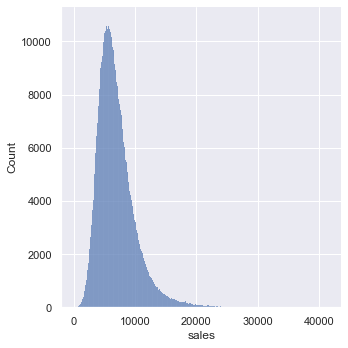

In [76]:
#plotar distribuição de vendas
sns.displot ( df4['sales'] )

A maioria dos algotirmos assumem premissas, como ter os dados distribuídos numa normal.
Quanto mais normal for a variável resposta, melhor o algoritmo vai performar.  

Há formas de tornar ela mais próximas de uma normal, como a log1p abaixo, que multiplica os valores de venda pelo log: (entenderei mais adiante)

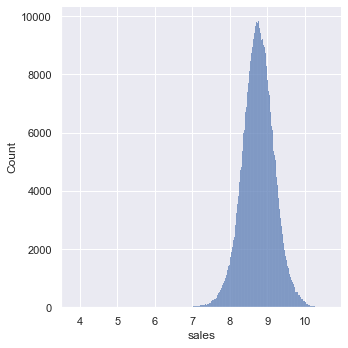

In [78]:
sns.displot (np.log1p ( df4['sales'] ) )

### Numerical Variable

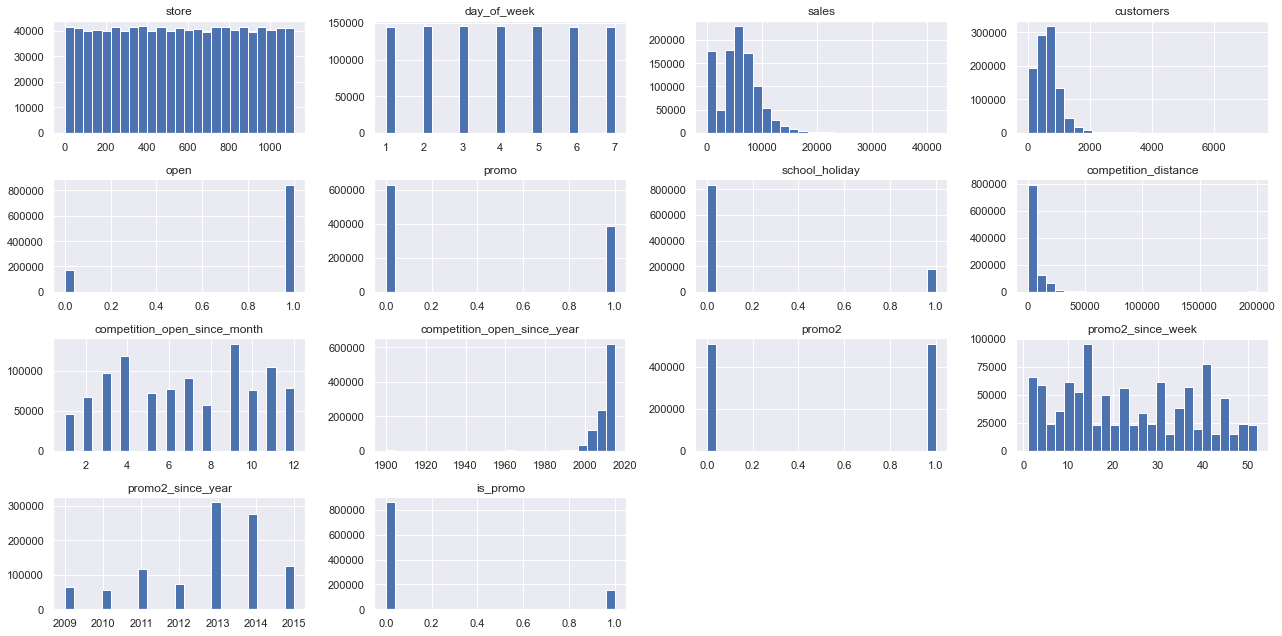

In [90]:
#Plotar histograma de todos os atributos numéricos  
#histograma é uma espécie de gráfico de barras que demonstra uma distribuição de frequências.

# bins é o número de barras, e ; é pra não mostrar texto
num_attributes.hist( bins = 25);
plt.tight_layout()

Se tem variação, nos ajuda a entender o fenômeno. 

days_of_week sozinha, se não for usada com outras variáveis, não tem relevância pro aprendizado do modelo.

sales e customers tem skew positiva: concentração de dados baixa (menor que a média)

promo: pra cada 3 lojas, 1 estava em promoção na data da venda.

promo2: só aprox. 50% das lojas estavam em promoção consecutiva (sequencia de uma anterios) quando venderam.

competition_distance: há uma enorme concentração de competidores próximos das lojas. 

### Categorical Variable

In [91]:
#resumir:
cat_attributes.head()
#vamos avaliar as 3 primeiras, as duas últimas são só derivações

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


#### state_holiday

In [92]:
df4['state_holiday'].value_counts()

regular_day       843428
public_holiday       694
easter_holiday       145
christmas             71
Name: state_holiday, dtype: int64

In [93]:
#pra voltar a ficar só com os tipos de dados originais
df4['state_holiday'].drop_duplicates()

0            regular_day
63559     public_holiday
129424    easter_holiday
241126         christmas
Name: state_holiday, dtype: object

/Users/home/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='Density'>

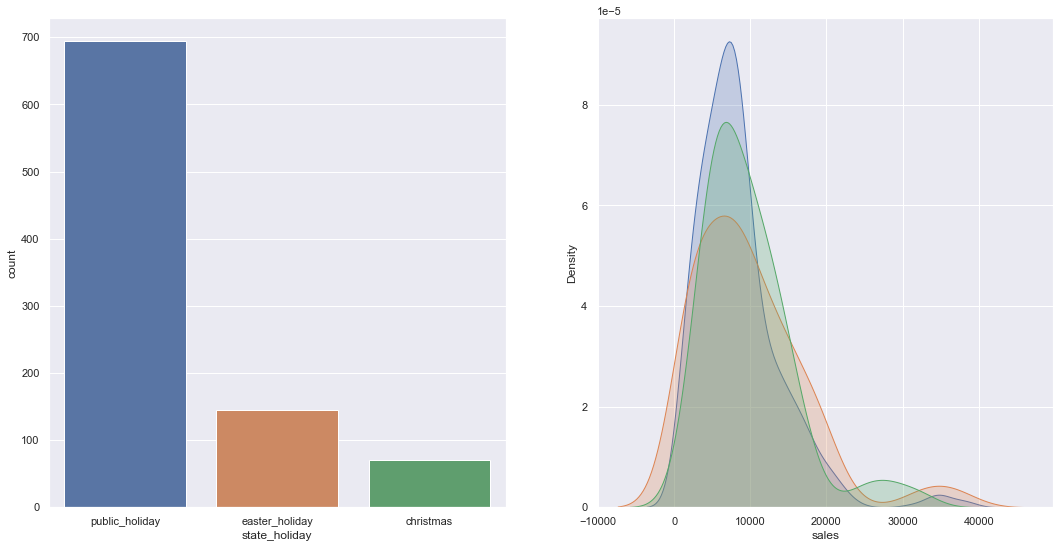

In [83]:
plt.subplot( 1,2,1)
#plotando apenas os feriados
a = df4.loc[df4['state_holiday'] != 'regular_day']
sns.countplot( a['state_holiday'] )

plt.subplot( 1,2,2)
#agora plotando os feriados sobrepostos
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'], shade=True, label='public_holiday')
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'], shade=True, label='easter_holiday') 
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'], shade=True, label='christmas') 

Interessante pro modelo saber o impacto que os feriados tem nas vendas, vamos usar a variável pra treinar o modelo.

#### store_type

In [94]:
df4['store_type'].value_counts()

a    457042
d    258768
c    112968
b     15560
Name: store_type, dtype: int64

In [95]:
#pra voltar a ficar só com os tipos de dados originais
df4['store_type'].drop_duplicates()

0     c
1     a
12    d
84    b
Name: store_type, dtype: object

/Users/home/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='Density'>

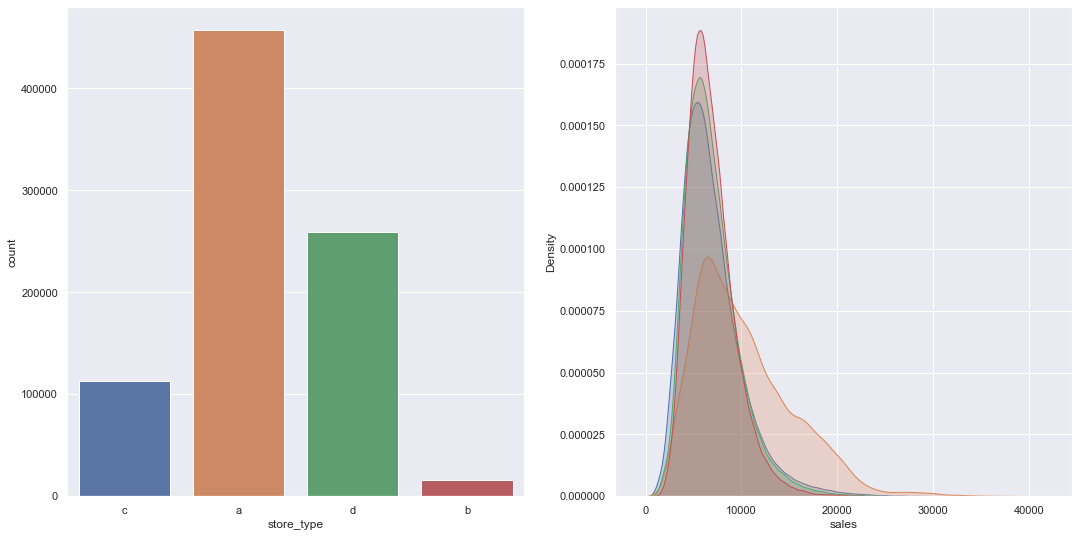

In [96]:
plt.subplot( 1,2,1)
#plotando os tipos das lojas
sns.countplot( df4['store_type'] )

plt.subplot( 1,2,2)
#agora plotando os feriados sobrepostos
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], shade=True, label='a')
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], shade=True, label='b') 
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], shade=True, label='c') 
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], shade=True, label='d')
#plt.tight_layout()

Interessante também pro modelo saber que o tipo de loja impacta assim na venda, vamos usar a variável pra treinar o modelo.

#### assortment

In [97]:
df4['assortment'].value_counts()

basic       444875
extended    391254
extra         8209
Name: assortment, dtype: int64

In [98]:
#pra voltar a ficar só com os tipos de dados originais
df4['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

/Users/home/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='Density'>

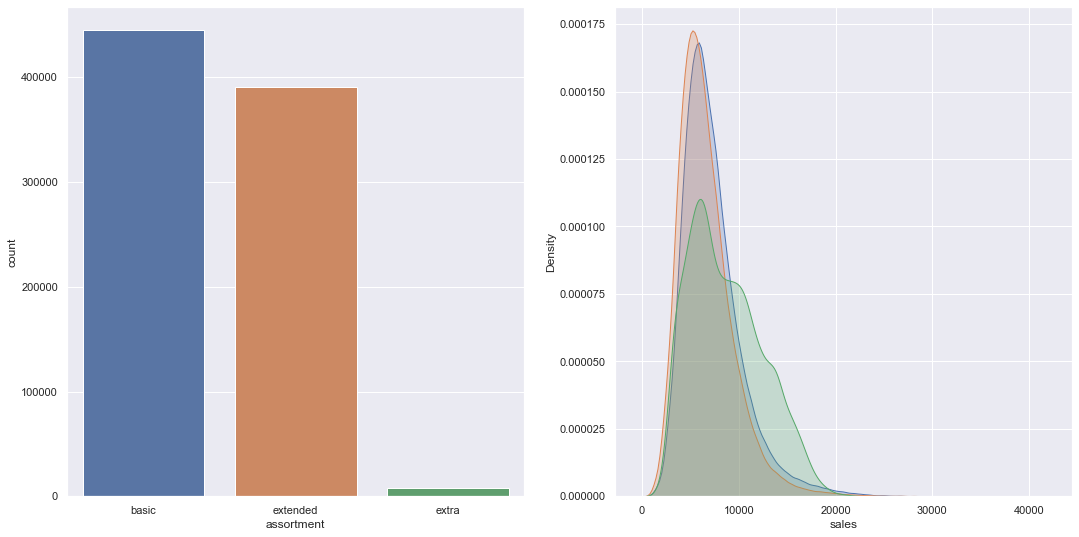

In [99]:
plt.subplot( 1,2,1)
#plotando os mixes das lojas
sns.countplot( df4['assortment'] )

plt.subplot( 1,2,2)
#agora plotando os feriados sobrepostos
sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], shade=True, label='extended')
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'], shade=True, label='basic') 
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'], shade=True, label='extra') 
#plt.tight_layout()

Interessante também pro modelo saber que o assorment de loja impacta na venda, vamos usar a variável pra treinar o modelo.

## Análise Bivariada

Responde: Qual a força do impacto de uma variável na variável resposta?

Vamos validar cada hipótese, e analisar se a variável é importante ou não pro modelo.

Vamos validar as 3 primieras hipóteses priorizadas

#### (H1 - loja) Lojas com maior sortimento deveriam vender mais.
***FALSA*** - Lojas com maior sortimento vendem menos.

<AxesSubplot:xlabel='assortment', ylabel='sales'>

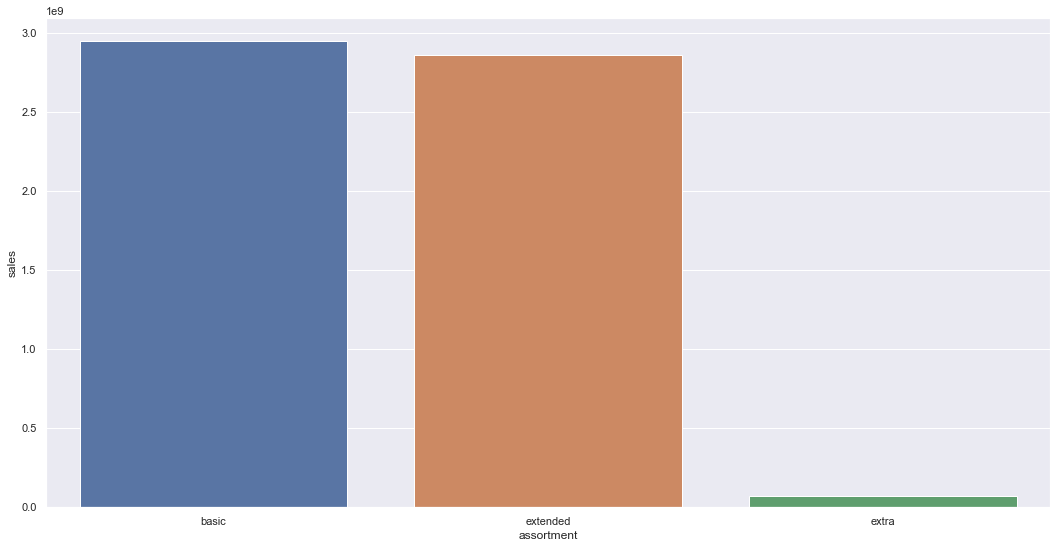

In [100]:
#Quantidade de vendas por loja:
aux1 = df4[['assortment','sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot ( x='assortment', y='sales', data=aux1 )

Assumimos que o assortment seja: basic < extended < extra, pois não tem essa legenda.
Baseados nisso, a hipótese é falsa, pois lojas com assortment extra vendem menos.


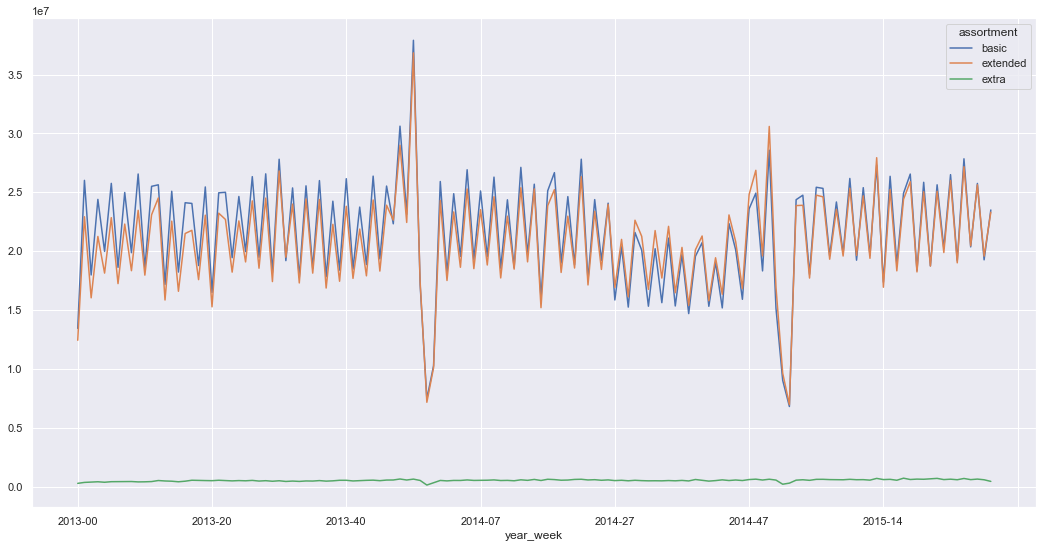

In [101]:
aux2 = df4[['year_week','assortment','sales']].groupby( ['year_week', 'assortment'] ).sum().reset_index()
aux2_piv = aux2.pivot ( index='year_week', columns='assortment', values='sales' ).plot()

Notamos que basic e extended tem praticamente o mesmo comportamento ao longo do tempo, já extra sempre teve bem menos vendas. 

Como extra tem muito menos vendas comparado com os demais, não dá pra ver a sua variação. Vamos olhar apenas ele agora:

In [102]:
#Obs: como é a estrutura de aux3 pra conseguir plotar: (tira o plot lá de cima pra rodar este)
aux2_piv

<AxesSubplot:xlabel='year_week'>

<AxesSubplot:xlabel='year_week'>

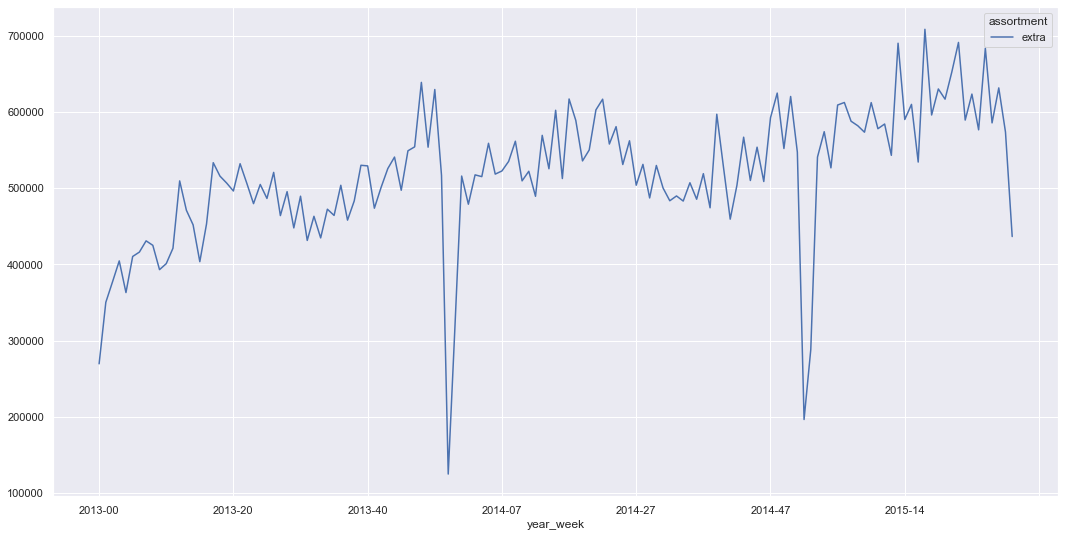

In [103]:
aux3 = aux2.loc[aux2['assortment'] == 'extra' ]
aux3.pivot ( index='year_week', columns='assortment', values='sales' ).plot()

Há variação também, mas diferente da oscilação dos demais assortments. Então é relevante pro modelo.

Importância para o modelo: Baixa mas relevante, pois numa única variável assortment, temos mais de um tipo de comportamento de venda.

#### (H2 - loja) Lojas com competidores mais próximos deveriam vender menos.
***FALSA*** - Lojas com mais competidores mais próximos vendem mais.


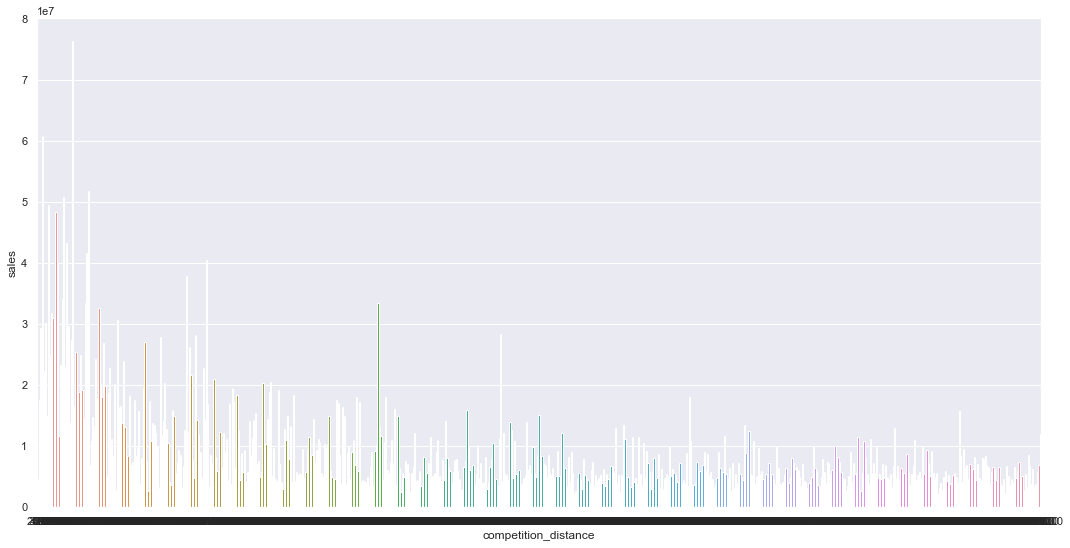

In [104]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()
sns.barplot (x='competition_distance', y='sales', data=aux1);

Como ficou ilegível, vamos criar bins pra ficar mais fácil:

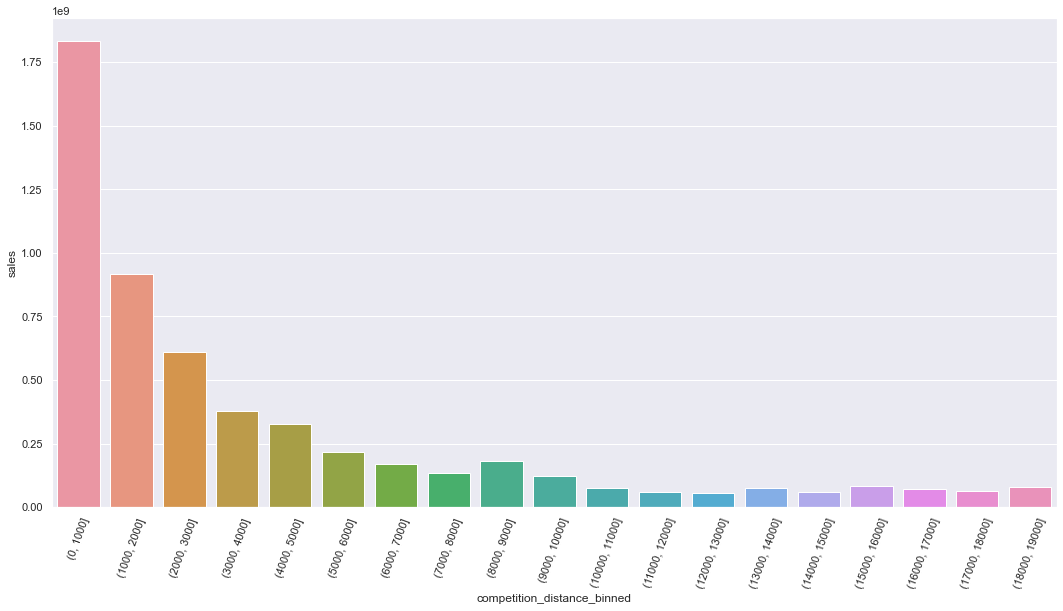

In [105]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()
#bins são listas de 0 a 20k, dividido em grupos de 1k. Mesmo que fique fora vendas > 20k,
#já me mostra bem a concentração
bins = list(np.arange(0 ,20000, 1000) )

#coloca 'competition_distance' dentro dos bins:
aux1['competition_distance_binned'] = pd.cut ( aux1['competition_distance'], bins=bins )
aux2 = aux1[['competition_distance_binned', 'sales']].groupby( 'competition_distance_binned' ).sum().reset_index()

sns.barplot (x='competition_distance_binned', y='sales', data=aux2);
plt.xticks(rotation=70);

Obs: Na legenda: () não inclui o intervalo, e [] inclui o intervalo. Ex: (0, 1500] é do 1 ao 1500.

Temos aqui um baita insight: quanto menor a distância dos competidores, maior a quantidade de vendas, contrário à crença que parecia mais 'lógica'. 

In [106]:
#Obs: Como fica o aux1:
aux1.sample(5)

,competition_distance,sales,competition_distance_binned
78,820.0,9957101,"(0.0, 1000.0]"
602,20620.0,8338762,NaN
605,20970.0,6461297,NaN
25,270.0,25366502,"(0.0, 1000.0]"
67,690.0,3739067,"(0.0, 1000.0]"


Agrupamos a distribuição em barras, mas para ver melhor a distribuição podemos usar um  scatterplot:

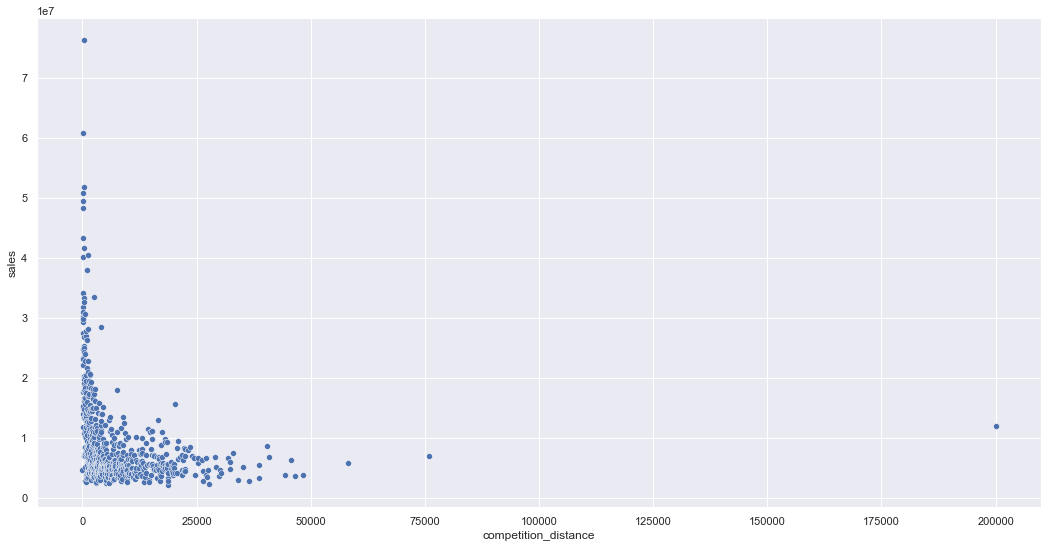

In [107]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()
sns.scatterplot (x='competition_distance', y='sales', data=aux1);

Cada ponto representa uma das 655 distâncias únicas! 

Agora, vamos ver a força da correlação entre 'competition_distance', 'sales', pra entender melhor a força do impacto desta variável na variável resposta.

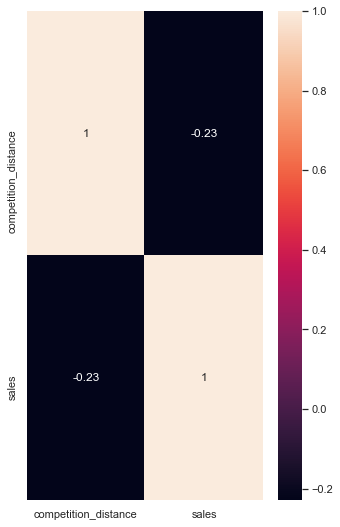

In [108]:
#força da correlação
plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr (method='pearson'),annot=True );

Há correlação, mas é fraca: conforme aumenta a distância, diminuem as vendas.
Como a correlação é fraca, assumo que o fenômeno (venda) aumenta ou diminui muito mais por interferêncai de outros agentes (fluxo de clientes por ex) do que pela distância da concorrência isolada.

Relevância para o modelo: Média.

#### (H3 - loja) Lojas com competidores há mais tempo deveriam vender mais.
***FALSA*** - Lojas com COMPETIDORES HÁ MAIS TEMPO vendem MENOS

In [109]:
# vamos usar o 'competition_time_month' que criamos, pra ver há quantos meses existe competição
df4[['competition_time_month','sales']]

,competition_time_month,sales
0,84,5263
1,94,6064
2,105,8314
3,71,13995
4,4,4822
...,...,...
1016776,77,3375
1016827,161,10765
1016863,0,5035
1017042,0,4491


<AxesSubplot:xlabel='competition_time_month', ylabel='sales'>

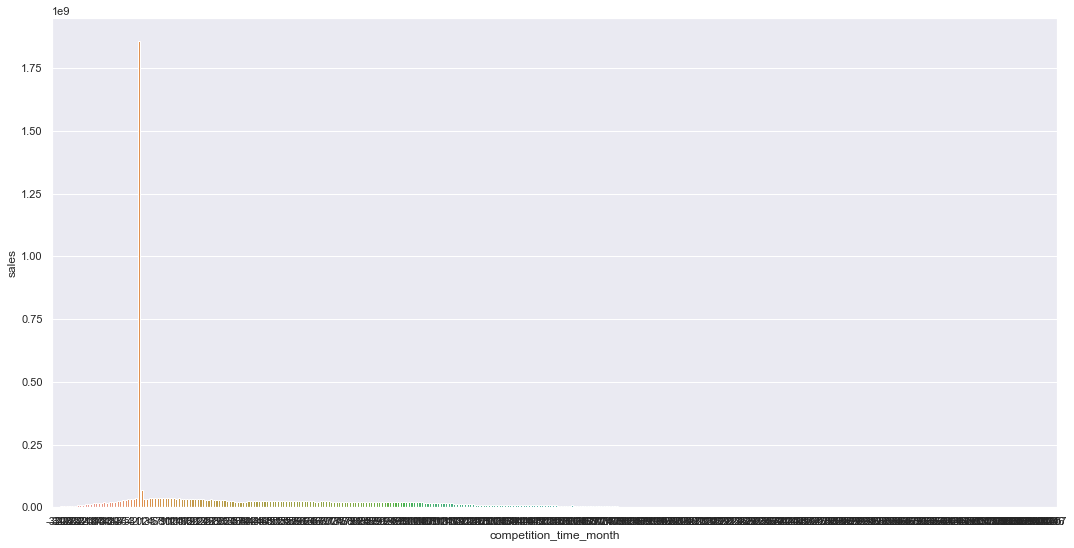

In [110]:
aux1 = df4[['competition_time_month','sales']].groupby( 'competition_time_month' ).sum().reset_index()
sns.barplot ( x='competition_time_month', y= 'sales', data=aux1 )

Ficou muito ruim de ver por este pico imenso. Vamos criar um filtro:

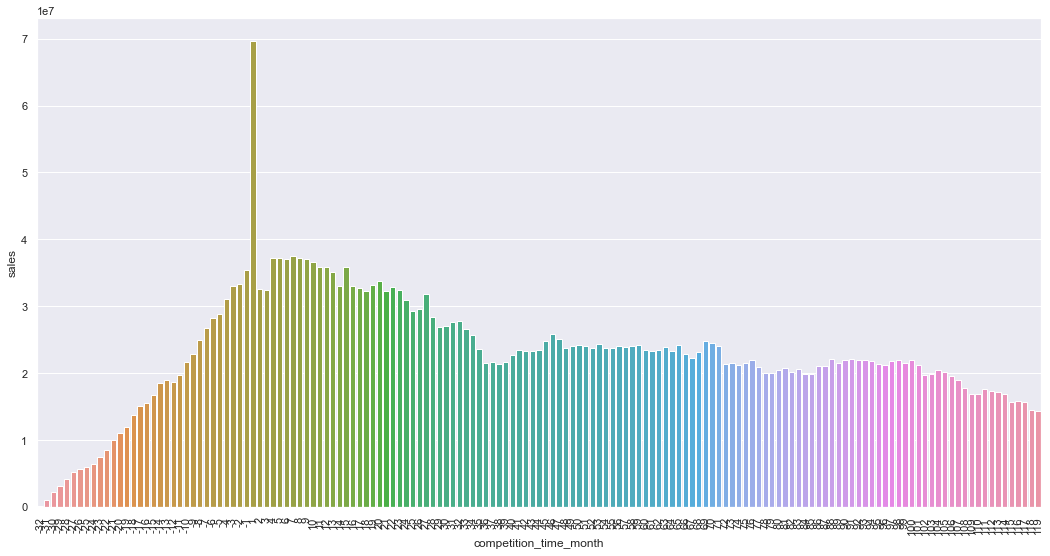

In [111]:
aux1 = df4[['competition_time_month','sales']].groupby( 'competition_time_month' ).sum().reset_index()
#filtrar só competição menor que 120 meses (10 anos) 
  #e que abriram em mês diferente do mesmo da venda (setamos esses no braço lá atrás):
aux2 = aux1[ ( aux1['competition_time_month'] < 120 ) & ( aux1['competition_time_month'] != 0 ) ]
sns.barplot ( x='competition_time_month', y= 'sales', data=aux2 )
plt.xticks(rotation=90);

Se valores positivo, competidor abriu há aquela quandiade de meses atrás dessa venda.
Se valor negativo, competidor vai abrir há aquela quandiade de meses pra frente desta venda. 

Insight bem contraditório ao senso comum:
Quanto mais recente é a competição (mais se aproxima o negativo de zero), maior é a venda!

Vamos agora criar um regplot de tendência de crescimento ou não: (só pra mostrar, mas não é boa nesse caso porque temos uma subida e uma descida nas vendas, então fica enviezado)

<AxesSubplot:xlabel='competition_time_month', ylabel='sales'>

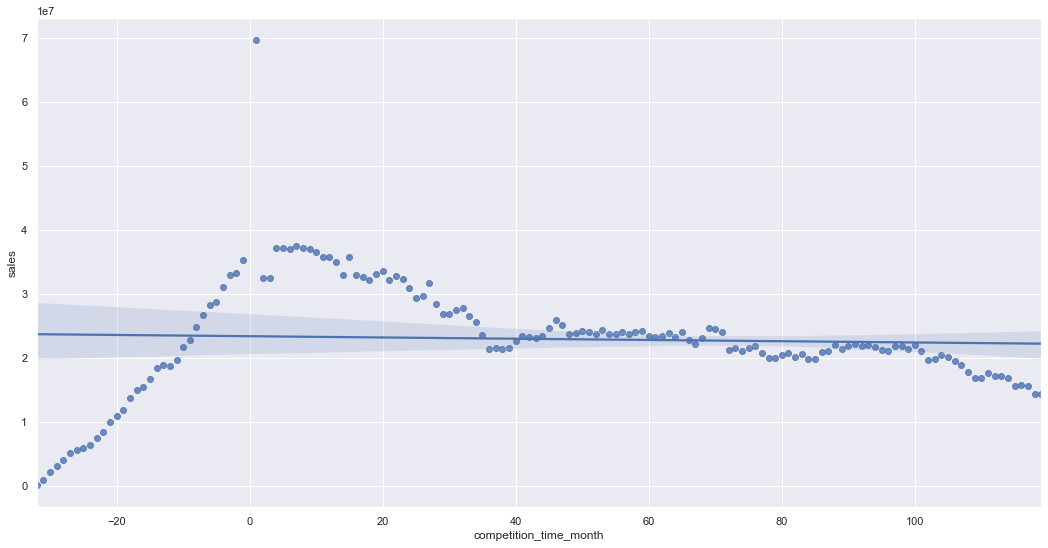

In [112]:
sns.regplot ( x='competition_time_month', y= 'sales', data=aux2 )

Vamos avaliar agora a correlação entre as variáveis:

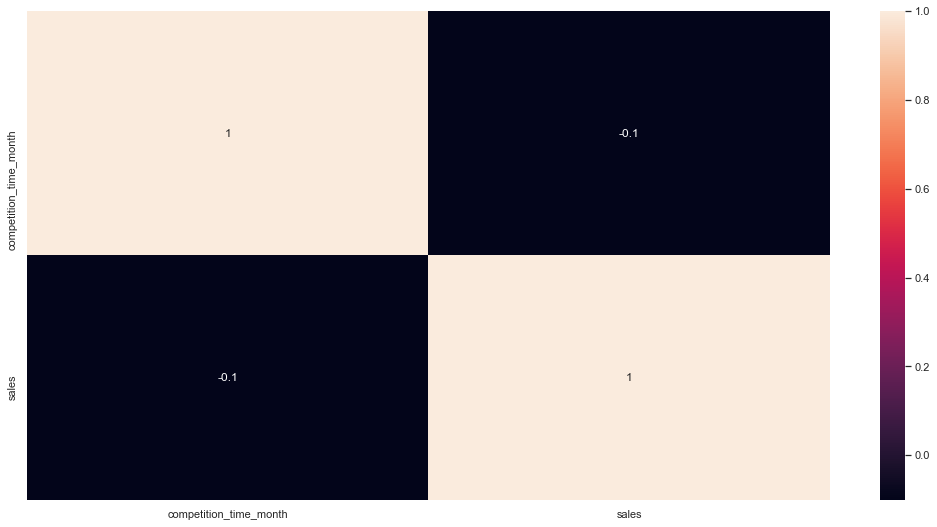

In [114]:
#força da correlação
sns.heatmap( aux1.corr (method='pearson'),annot=True );

Relevância para o modelo: média.

#### (H4 - prod) Lojas com promoções ativas por mais tempo deveriam vender mais.
***FALSA*** - Lojas com PROMOÇÕES ATIVAS POR MAIS TEMPO vendem MENOS depois de um certo período de promoção.

In [116]:
df4.head(15)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo2_since,promo2_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0
5,6,5,2015-07-31,5651,589,1,1,regular_day,1,a,basic,310.0,12,2013,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2013-12-01,20,2015-07-27,0
6,7,5,2015-07-31,15344,1414,1,1,regular_day,1,a,extended,24000.0,4,2013,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2013-04-01,28,2015-07-27,0
7,8,5,2015-07-31,8492,833,1,1,regular_day,1,a,basic,7520.0,10,2014,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2014-10-01,10,2015-07-27,0
8,9,5,2015-07-31,8565,687,1,1,regular_day,1,a,extended,2030.0,8,2000,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2000-08-01,182,2015-07-27,0
9,10,5,2015-07-31,7185,681,1,1,regular_day,1,a,basic,3160.0,9,2009,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0


In [120]:
df4['promo2_time_week'].value_counts()

 0      421646
 52       3910
 98       1872
 102      1847
 97       1830
         ...  
-125        18
-123        18
-122        18
-124        18
-126        12
Name: promo2_time_week, Length: 440, dtype: int64

promo2_time_week negativo: significa que a venda foi feita no período promocional normal.
promo2_time_week positivo: significa que a venda foi feita no período promocional estendido.

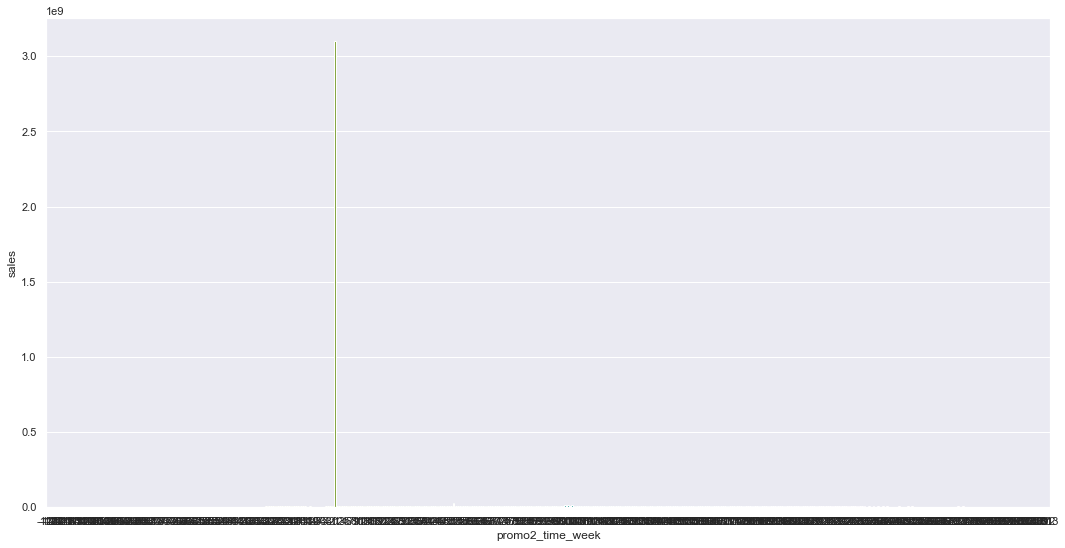

In [121]:
aux1 = df4[['promo2_time_week', 'sales']].groupby ( 'promo2_time_week' ).sum().reset_index()
sns.barplot( x='promo2_time_week', y='sales', data=aux1 );

Como ficou ilegível, vamos olhar o período promocional separado do estendido:

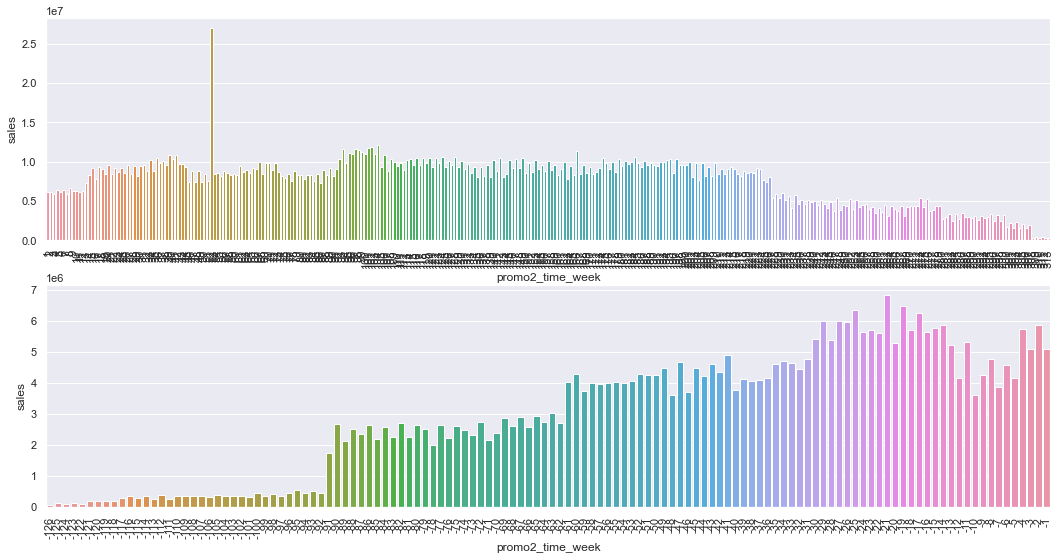

In [124]:
#linhas, coluna, posição
plt.subplot (2, 1, 1)
aux2 = aux1[aux1['promo2_time_week'] > 0] # promo extendido
sns.barplot( x='promo2_time_week', y='sales', data=aux2 );
plt.xticks (rotation=90);

plt.subplot (2, 1, 2)
aux3 = aux1[aux1['promo2_time_week'] < 0] # promo regular
sns.barplot( x='promo2_time_week', y='sales', data=aux3 );
plt.xticks (rotation=90);

Analisando o gráfico superior, podemos ver que a promoção extendida vende regularmente até um momento, mas a partir da 4º parte final do gráfico, as vendas caem.
Analisando o gráfico inferior, podemos ver que antes de chegar na promoção, há aumento nas vendas, talvez pelo efeito do marketing.
Logo, a hipótese já é FALSA, pois: Lojas com PROMOÇÕES ATIVAS POR MAIS TEMPO vendem MENOS. Vai caindo as vendas conforme o tempo passa.

Sobre a relevância para o modelo, vamos avaliar melhor com um gráfico de regplot pra ver a tendência tanto na promo regular como na promo extendida:

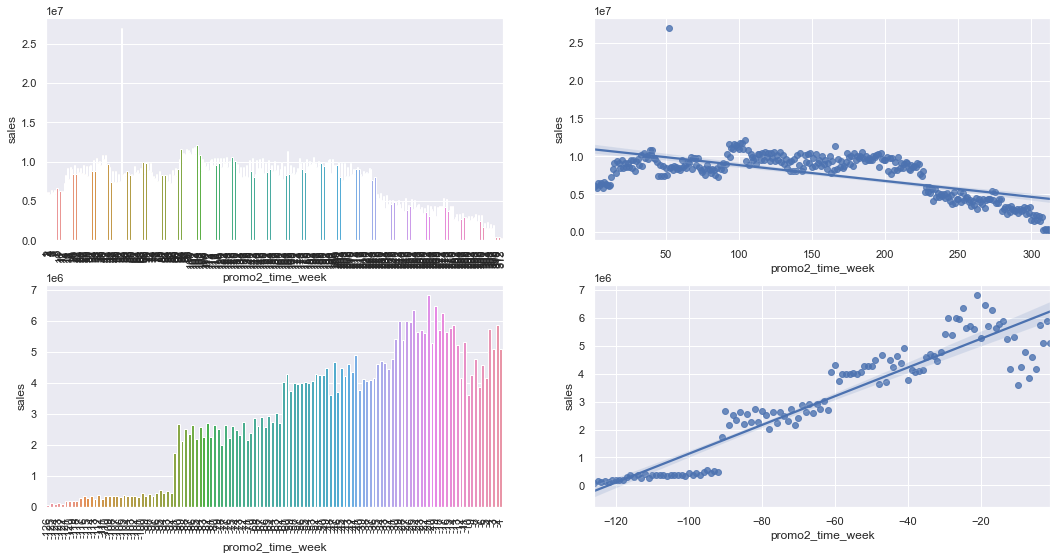

In [125]:
plt.subplot (2, 2, 1)
aux2 = aux1[aux1['promo2_time_week'] > 0] # promo extendido
sns.barplot( x='promo2_time_week', y='sales', data=aux2 );
plt.xticks (rotation=90);

plt.subplot (2, 2, 2)
sns.regplot( x='promo2_time_week', y='sales', data=aux2 );

plt.subplot (2, 2, 3)
aux3 = aux1[aux1['promo2_time_week'] < 0] # promo regular
sns.barplot( x='promo2_time_week', y='sales', data=aux3 );
plt.xticks (rotation=90);

plt.subplot (2, 2, 4)
sns.regplot( x='promo2_time_week', y='sales', data=aux3 );

Agora conseguimos constatar a tendência de aumento de vendas no período promocional normal, e também de queda no período promocional estendido após um tempo.
Vamos medir a correlação agora de promoções com vendas de modo geral, colocando em um grid pra melhorar a visualização:

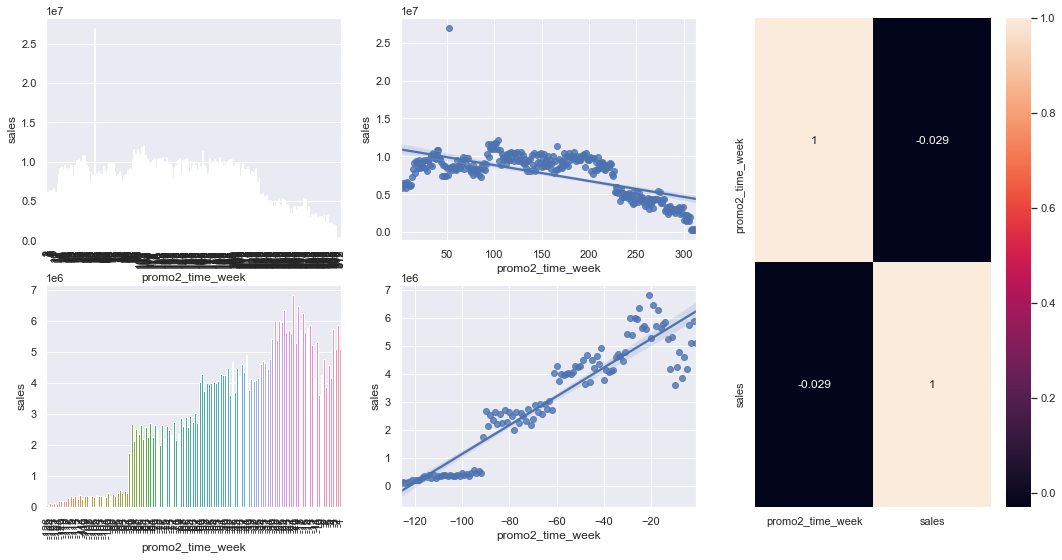

In [132]:
grid = plt.GridSpec (2, 3)

plt.subplot (grid[0,0])
aux2 = aux1[aux1['promo2_time_week'] > 0] # promo extendido
sns.barplot( x='promo2_time_week', y='sales', data=aux2 );
plt.xticks (rotation=90);

plt.subplot (grid[0,1])
sns.regplot( x='promo2_time_week', y='sales', data=aux2 );

plt.subplot (grid[1,0])
aux3 = aux1[aux1['promo2_time_week'] < 0] # promo regular
sns.barplot( x='promo2_time_week', y='sales', data=aux3 );
plt.xticks (rotation=90);

plt.subplot (grid[1,1])
sns.regplot( x='promo2_time_week', y='sales', data=aux3 );

plt.subplot (grid[:,2])
sns.heatmap( aux1.corr (method='pearson'), annot=True );

Relevância para o modelo: baixa relavância isoladamente. Correlação de -0,029: muito fraca.  Pode ser que combinada com outra feature, seja relevante.
Obs: pro modelo, não quebramos em aux2, aux3 como fizemos aqui, só quebramos pra poder olhar melhor em gráfico o comportamento dos dados.

#### <s> (H5 - prod) Lojas com mais dias de promoção deveriam vender mais.</s>

Promoções ativas por mais tempo = mais dias de promoção.
Pra poder validar essa hipótese, precisariamos fazer feature engeneering novamente, criando nova variável dias_de_promocao e agrupar todos os dias de promoção por loja. Ai, fazer esse count.. como trabalhamos com CRISP, vamos deixar pro segundo ciclo pra fechar esse primero o mais rápido possível. 

#### (H6 - prod) Lojas com mais promoções consecutivas deveriam vender mais.
***FALSA*** - Lojas com MAIS PROMOÇÕES CONSECUTIVAS vendem MENOS.

Vamos avaliar aqui se lojas que entram no período consegutivo de promoção vendem mais que as que não entram.

In [135]:
df4[['promo', 'promo2', 'sales']].groupby ( ['promo', 'promo2'] ).sum().reset_index()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


Constatamos que houve mais vendas nas lojas que só participaram da promo 1, e logo depois as lojas que não participaram de nenhuma promoção.
Vamos ver se esse comportamento mudou ao longo do tempo.

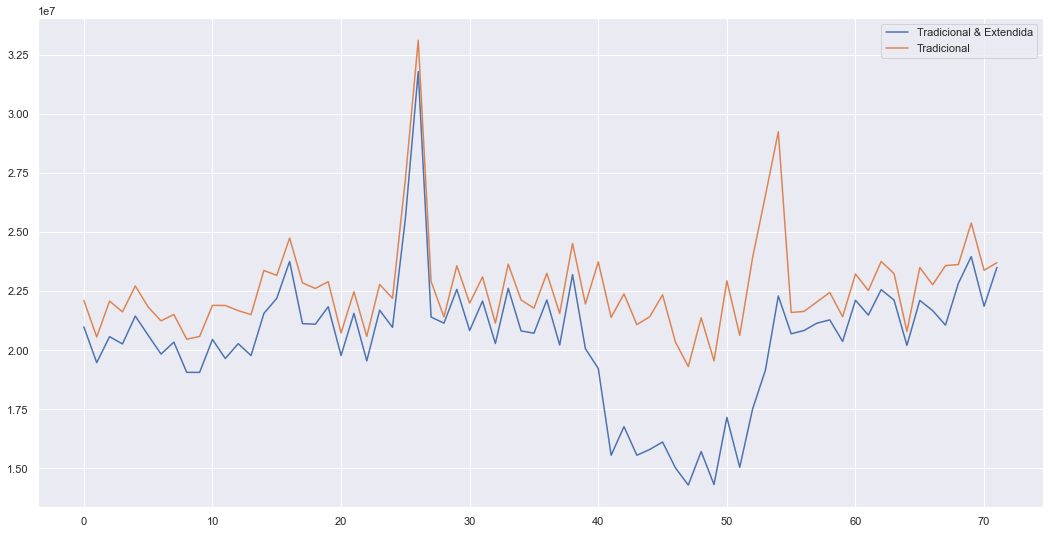

In [145]:
#plotar só vendas de lojas que participaram da promo 1 tradicional e promo 2 extendida:
aux1 = df4[ ( df4['promo'] == 1 ) & ( df4['promo2'] == 1 ) ][['year_week','sales']].groupby ( 'year_week' ).sum().reset_index()
ax = aux1.plot()

#plotar só vendas de lojas que só participaram da promo 1 tradicional e NÃO da promo 2 extendida:
aux2 = df4[ ( df4['promo'] == 1 ) & ( df4['promo2'] == 0 ) ][['year_week','sales']].groupby ( 'year_week' ).sum().reset_index()
aux2.plot(ax=ax)

ax.legend( labels=['Tradicional & Extendida','Tradicional'])

Vemos então que lojas com mais promoções consecutivas vendem menos, pode ser um insight importante para o negócio.

Relevância para o modelo: baixa. Analisando estas variávies sozinhas, não parecem ser muito relevantes para o modelo, pois só tem uma parte onde o gráfico difere mais. Mais adiante vamos ter uma segunda opinião de um algorítmo.

#### (H7 - sazo) Lojas abertas duantes o feriado de natal deveriam vender mais.
***FALSA*** - Lojas abertas durante o feriado de natal vendem menos que nos demais feriados do ano.

Eliminei registros onde não houveram vendas lá no início da análise. Logo, vou comparar as vendas do feriado de natal com as vendas dos demais feriados:

In [148]:
df4['state_holiday'].value_counts()

regular_day       843428
public_holiday       694
easter_holiday       145
christmas             71
Name: state_holiday, dtype: int64

<AxesSubplot:xlabel='state_holiday', ylabel='sales'>

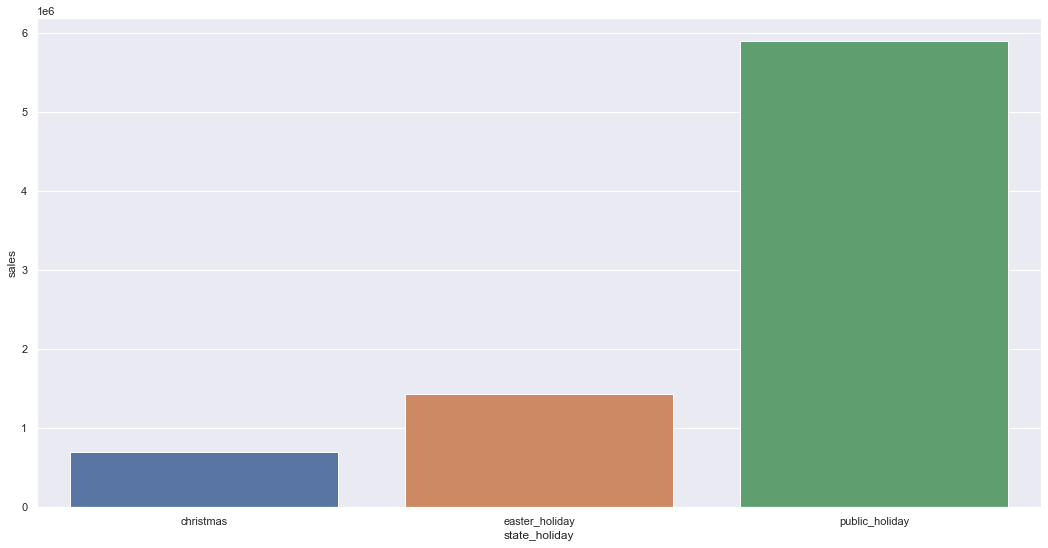

In [162]:
aux = df4[df4['state_holiday'] != 'regular_day']
aux1 = aux[['state_holiday','sales']].groupby ('state_holiday').sum().reset_index()
sns.barplot( x='state_holiday', y='sales', data=aux1 )

Já vemos que a hipótese é falsa, pois o natal vende menos que outros feriados.
Vamos ver ao longo do tempo se em algum momento já vendeu, pegando pelos anos:

<AxesSubplot:xlabel='year', ylabel='sales'>

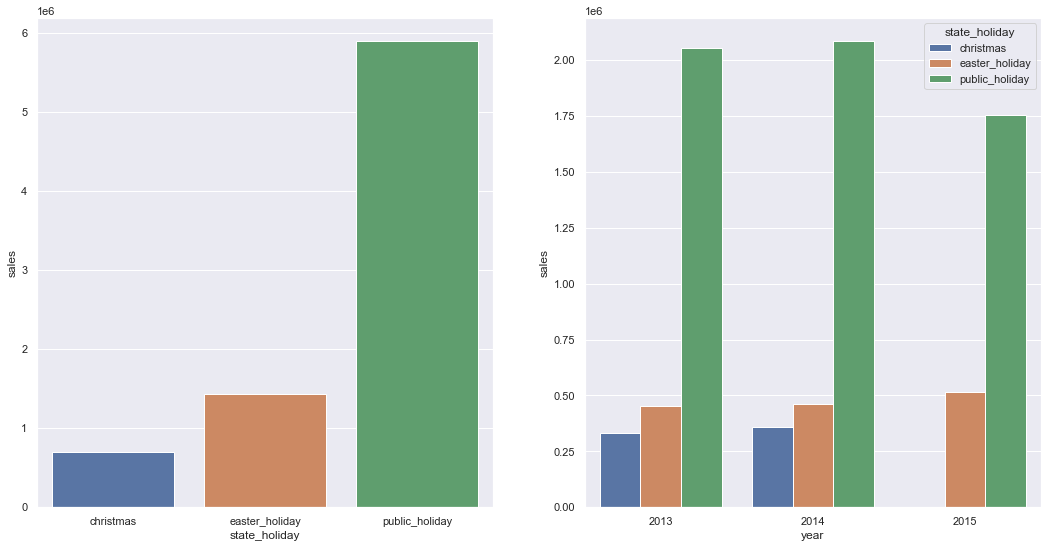

In [167]:
aux = df4[df4['state_holiday'] != 'regular_day']

plt.subplot( 1,2,1 )
aux1 = aux[['state_holiday','sales']].groupby ('state_holiday').sum().reset_index()
sns.barplot( x='state_holiday', y='sales', data=aux1 )

plt.subplot( 1,2,2 )
aux2 = aux[['year','state_holiday', 'sales']].groupby( ['year','state_holiday'] ).sum().reset_index()
sns.barplot( x='year', y='sales', data=aux2, hue='state_holiday' )
#hue = tipos de barras, pra cada state_holiday quero uma barra

Realmente, as vendas no notal sempre são menores que nos demais feriados. Em 2015, não temos dados.
Logo, a hipótese é falsa.

Importância para o modelo: média, relevante pois o modelo vai considerar essa variação de vendas de acordo com state_holiday

#### (H8 - sazo) Lojas deveriam vender mais ao longo dos anos.
***FALSA*** - Lojas vendem menos ao longo dos anos.

In [170]:
df4['year'].value_counts()

2013    337924
2014    310385
2015    196029
Name: year, dtype: int64

Vou agrupar as vendas por ano, e ver se há aumento de vendas entre 2013 e 1015:

<AxesSubplot:xlabel='year', ylabel='sales'>

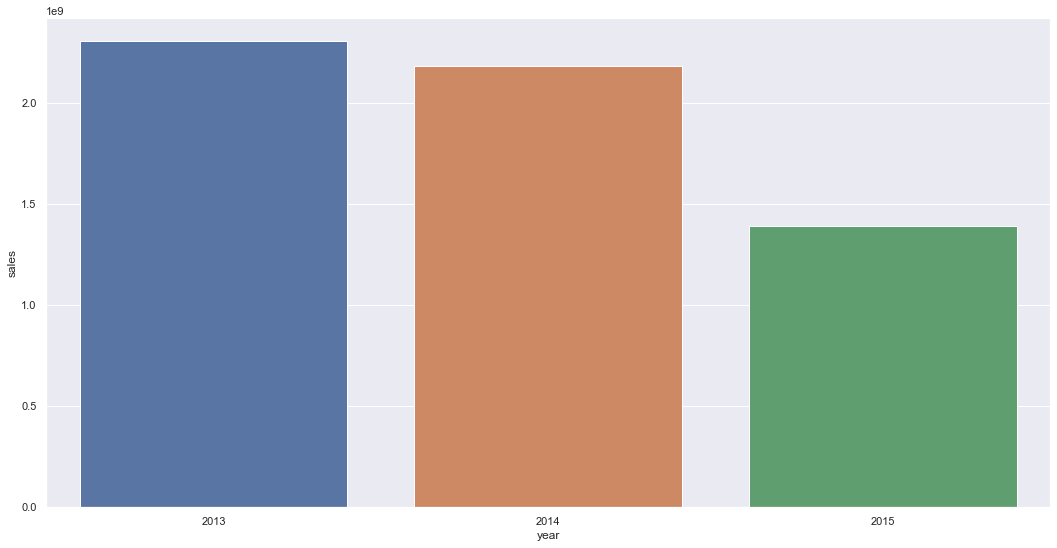

In [175]:
aux1 = df4[['year','sales']].groupby( 'year' ).sum().reset_index()
sns.barplot (x='year', y='sales', data=aux1)

Vendas vem caindo ao longo dos anos, ainda que 2015 não esteja fechado.
Vamos ver a correlação:

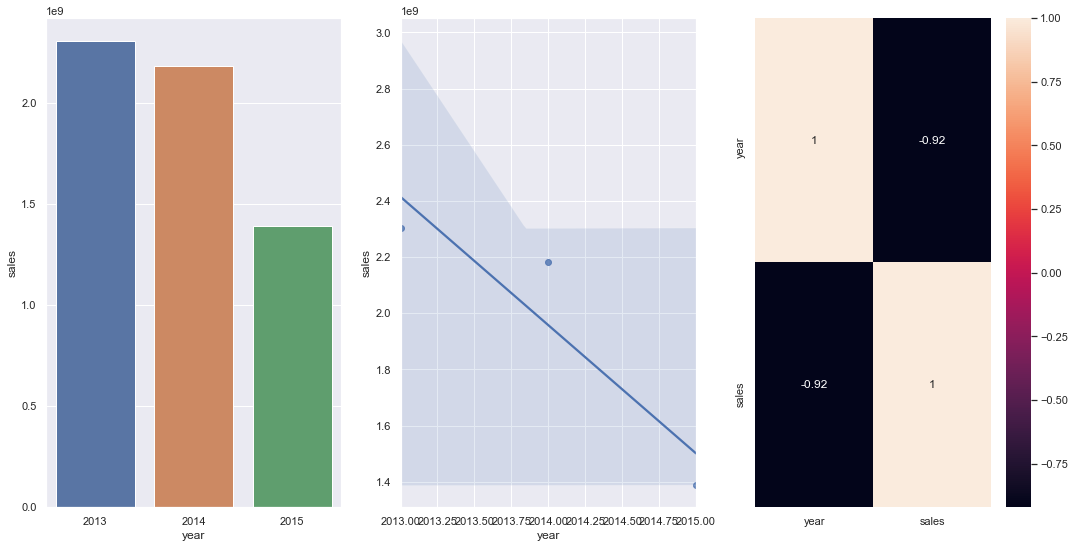

In [200]:
aux1 = df4[['year','sales']].groupby( 'year' ).sum().reset_index()

#linha, coluna, posição
plt.subplot(1, 3, 1)
sns.barplot (x='year', y='sales', data=aux1);

plt.subplot(1, 3, 2)
sns.regplot (x='year', y='sales', data=aux1);

plt.subplot(1, 3, 3)
sns.heatmap (aux1.corr(method='pearson'), annot=True );

Correlação negativa muito forte de -0,92: conforme os anos avançam, as vendas caem. 
Como 2015 não está fechado, temos dados até aprox. agosto, ideal é pegar só períodos fechados, pois temos dados enviesados aqui.
Ano então é uma variável importante pro modelo. Não deve ser novidade pra empresa esta queda.

Relevância para o modelo: alta, pois ainda que tenhamos pego só parte de 2015, a correlação é altíssima entre vendas e anos, logo vai ajudar na previsão dos próximos anos.

#### (H9 - sazo) Lojas deveriam vender mais no segundo semestre do ano.
***FALSA*** - Lojas VENDEM MENOS no SEGUNDO SEMESTRE DO ANO.

Vamos analisar por mês, pois já temos a variável month pronta:

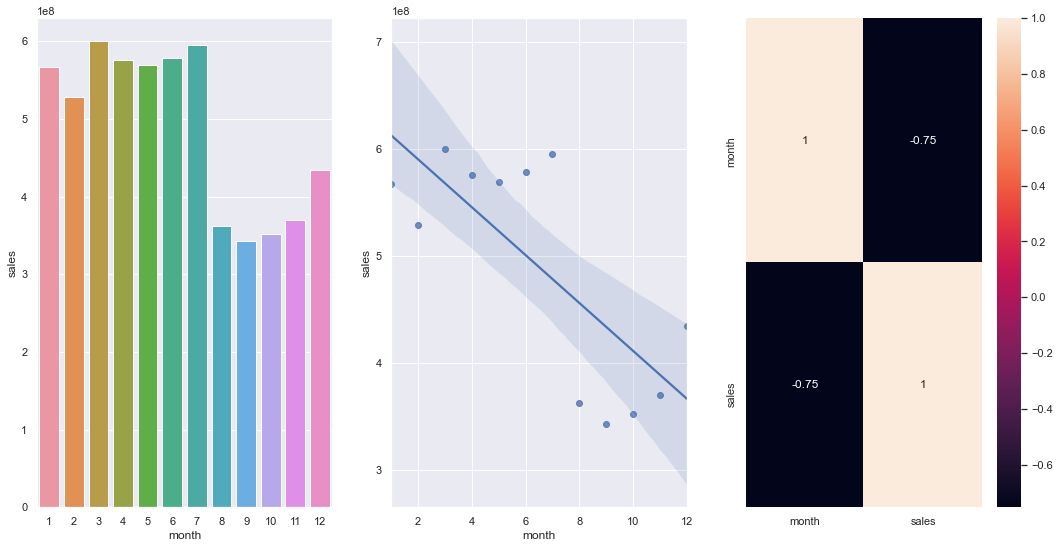

In [207]:
aux1 = df4[['month','sales']].groupby( 'month' ).sum().reset_index()

#linha, coluna, posição
plt.subplot(1, 3, 1)
sns.barplot (x='month', y='sales', data=aux1);

plt.subplot(1, 3, 2)
sns.regplot (x='month', y='sales', data=aux1);

plt.subplot(1, 3, 3)
sns.heatmap (aux1.corr(method='pearson'), annot=True );

Bem marcante o fato das lojas da Rossmann venderem muito mais no primeiro semestre que no segundo. Correlação negativa entre meses e vendas muito alta, de -0,75.

Importância para o modelo: Alta, pois há grande correlação entre mês e vendas.

#### (H10 - sazo) Lojas deveriam vender mais depois do dia 10 de cada mês.
***FALSA*** - Lojas VENDEM MENOS DEPOIS do dia 10 de cada mês.

Vamos verificar primeiramente por dia:

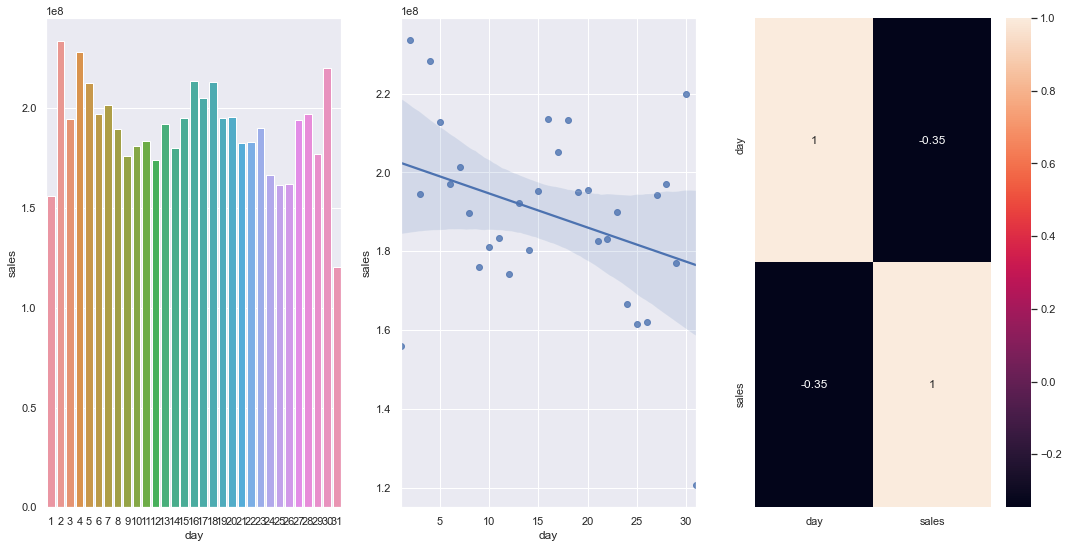

In [210]:
aux1 = df4[['day','sales']].groupby( 'day' ).sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot (x='day', y='sales', data=aux1);

plt.subplot(1, 3, 2)
sns.regplot (x='day', y='sales', data=aux1);

plt.subplot(1, 3, 3)
sns.heatmap (aux1.corr(method='pearson'), annot=True );

Vamos agora verificar antes e depois do dia 10:

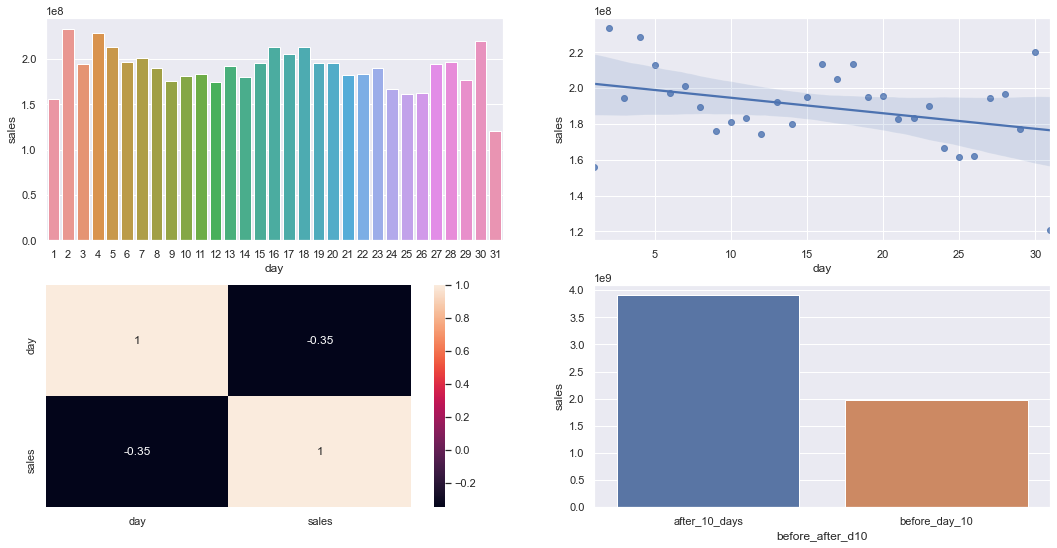

In [231]:
aux1 = df4[['day','sales']].groupby( 'day' ).sum().reset_index()

plt.subplot(2, 2, 1)
sns.barplot (x='day', y='sales', data=aux1);

plt.subplot(2, 2, 2)
sns.regplot (x='day', y='sales', data=aux1);

plt.subplot(2, 2, 3)
sns.heatmap (aux1.corr(method='pearson'), annot=True );

plt.subplot(2, 2, 4)
aux1['before_after_d10'] = aux1['day'].apply( lambda x: 
                                'before_day_10' if x <=10 else 'after_10_days' )
aux2 = aux1[['before_after_d10','sales']].groupby( 'before_after_d10' ).sum().reset_index()
sns.barplot(x='before_after_d10', y='sales', data=aux2);

No último gráfico inferior, vemos que se antes do dia 10 (laranja) vende pouco mais da metade com relação a depois do dia 10 (azul), que corresponde a 2 partes do mês.
Logo, constatamos que há uma redução leve de vendas ao longo dos dias do mês, contrariando a hipótese de que as lojas deveriam vender mais depois do dia 10 do mês.

Relevância para o modelo: alta, apesar da correlação mais fraca.

#### (H11 - sazo) Lojas deveriam vender menos aos finais de semana.
***VERDADEIRA*** - Lojas VENDEM MENOS aos FINAIS DE SEMANA.

Vamos olhar inicialmente por dia da semana:

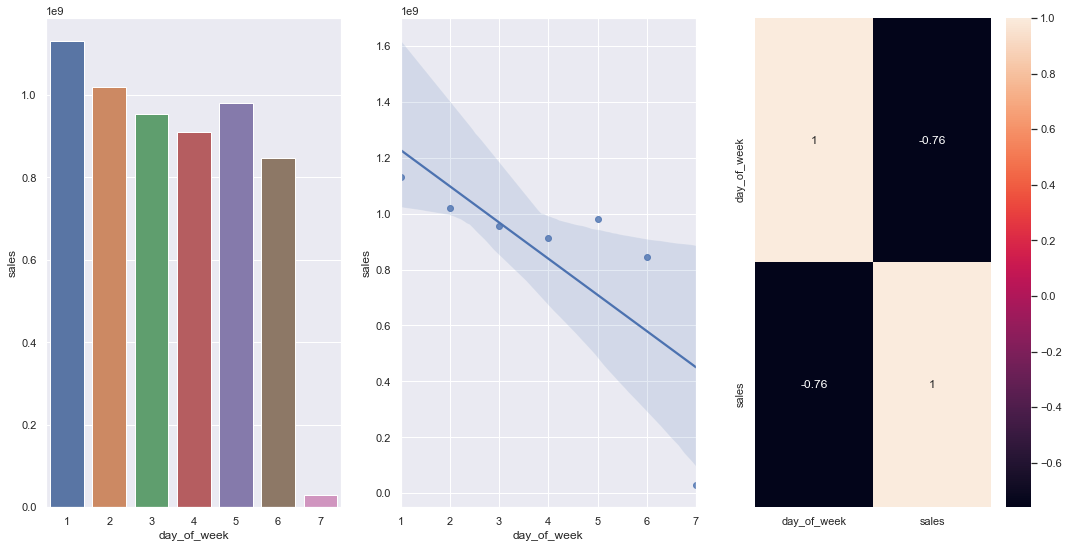

In [235]:
aux1 = df4[['day_of_week','sales']].groupby( 'day_of_week' ).sum().reset_index()

plt.subplot(1, 3, 1)
sns.barplot (x='day_of_week', y='sales', data=aux1);

plt.subplot(1, 3, 2)
sns.regplot (x='day_of_week', y='sales', data=aux1);

plt.subplot(1, 3, 3)
sns.heatmap (aux1.corr(method='pearson'), annot=True );


As vendas caem conforme passam os dias da semana, em especial no fim de semana.
O sábado é o dia de menos vendas, após o domingo, onde quase não há vendas.
Já aqui ficou claro, hipótese falsa. Nem precisamos separar por dia da semana e final de semana.

Relevância para o modelo: alta, pois há grande correlação entre dias da semana e vendas.

#### (H12 - sazo) Lojas deveriam vender menos durante os feriados escolares.
***VERDADEIRA*** - Lojas VENDEM MENOS durante os FERIADOS ESCOLARES, exceto nos meses de agosto.

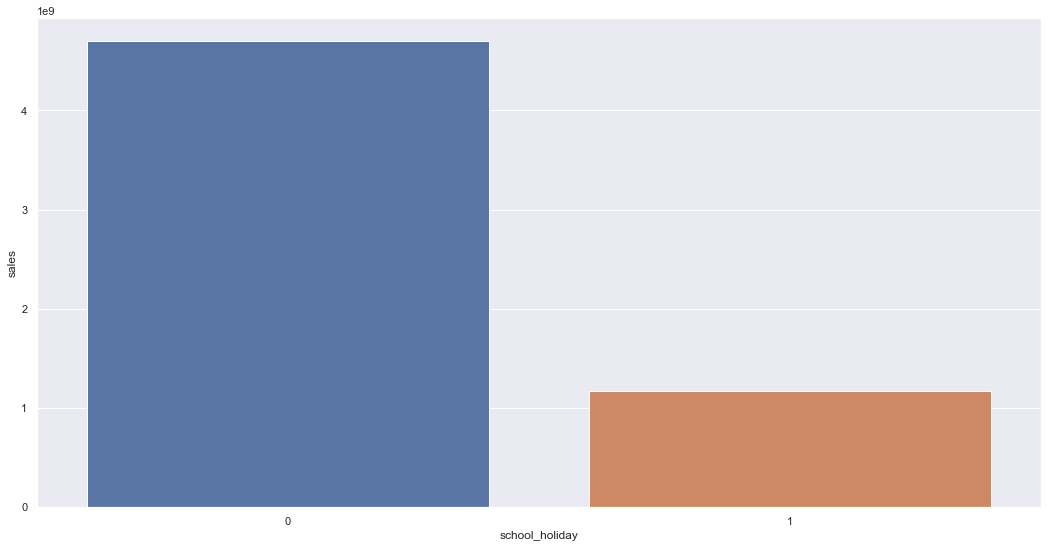

In [236]:
aux1 = df4[['school_holiday','sales']].groupby( 'school_holiday' ).sum().reset_index()
sns.barplot (x='school_holiday', y='sales', data=aux1);

Óbvio, como tem muito menos dias de ferias escolares do que dias normais, lojas vendem mais nos dias normais.
Vamos ver se tem alguma exceção em algum mês:

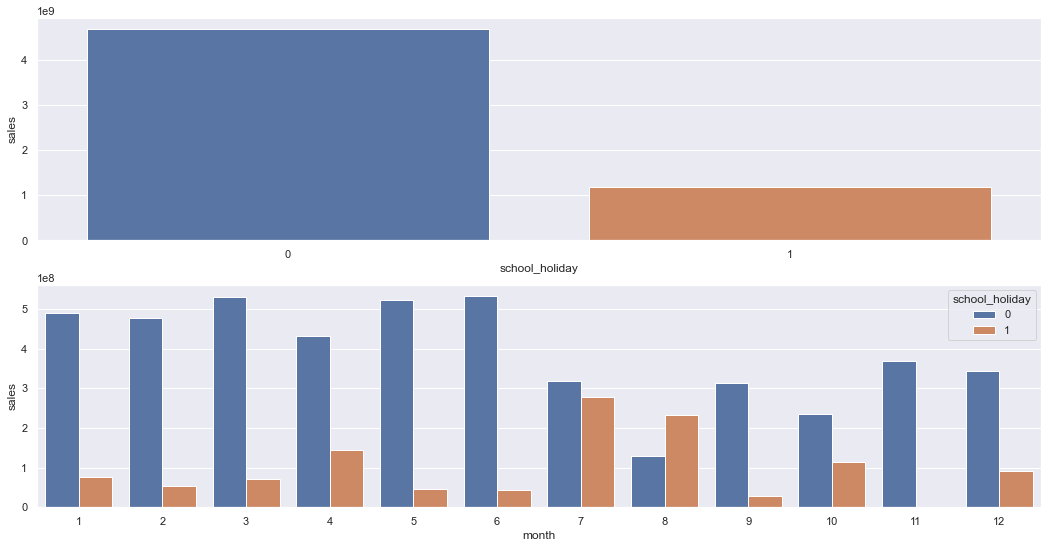

In [239]:
aux1 = df4[['school_holiday','sales']].groupby( 'school_holiday' ).sum().reset_index()
plt.subplot(2,1,1)
sns.barplot (x='school_holiday', y='sales', data=aux1);

aux2 = df4[['month', 'school_holiday','sales']].groupby( ['month','school_holiday'] ).sum().reset_index()
plt.subplot(2,1,2)
sns.barplot (x='month', y='sales', data=aux2, hue='school_holiday');

Notamos que em julho, as vendas em feriados escolares são próximas, pois talvez na maioria dos dias não há aulas. 
Em agosto, possivelmente seja um mês forte de férias, e temos até mais vendas em feriados escolares que fora deles.

Relevância para o modelo: média, pois há variação no comportamento nos meses 7 e 8, que deve ser considerada.

### Resumo das Hipóteses

In [253]:
tab = [['Hipoteses', 'Conclusão', 'Relevância Estimada'],
       ['H1', 'Falsa', 'Baixa'],
       ['H2', 'Falsa', 'Média'],
       ['H3', 'Falsa', 'Média'],
       ['H4', 'Falsa', 'Baixa'],
       ['H5', '-', '-'],
       ['H6', 'Falsa', 'Baixa'],
       ['H7', 'Falsa', 'Média'],
       ['H8', 'Falsa', 'Alta'],
       ['H9', 'Falsa', 'Alta'],
       ['H10', 'Falsa', 'Alta'],
       ['H11', 'Verdadeira', 'Alta'],
       ['H12', 'Verdadeira', 'Baixa']
      ]
print(tabulate(tab, headers='firstrow', stralign='center'))
#tablefmt='pipe', tablefmt='grid'

 Hipoteses    Conclusão    Relevância Estimada
-----------  -----------  ---------------------
    H1          Falsa             Baixa
    H2          Falsa             Média
    H3          Falsa             Média
    H4          Falsa             Baixa
    H5            -                 -
    H6          Falsa             Baixa
    H7          Falsa             Média
    H8          Falsa             Alta
    H9          Falsa             Alta
    H10         Falsa             Alta
    H11      Verdadeira           Alta
    H12      Verdadeira           Baixa


## Análise Multivariada

Responde: Como as variáveis impactam nas outras, e como elas juntas impactam na variável resposta.

### Numerical Attributes

In [262]:
num_attributes.head()

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
0,1,5,5263,555,1,1,1,1270.0,9,2008,0,31,2015,0
1,2,5,6064,625,1,1,1,570.0,11,2007,1,13,2010,1
2,3,5,8314,821,1,1,1,14130.0,12,2006,1,14,2011,1
3,4,5,13995,1498,1,1,1,620.0,9,2009,0,31,2015,0
4,5,5,4822,559,1,1,1,29910.0,4,2015,0,31,2015,0


<AxesSubplot:>

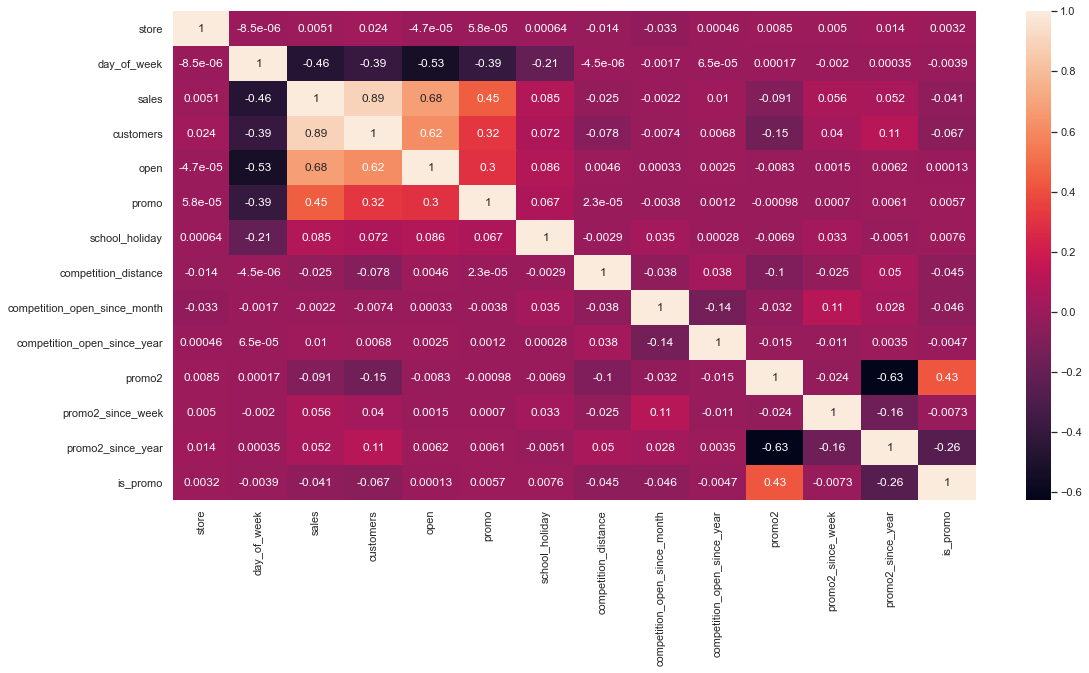

In [260]:
correlation = num_attributes.corr( method='pearson')
sns.heatmap ( correlation, annot=True )

Um dos problemas de previsão bem comuns, é não poder usar variáveis que sabemos que impactam muito, como no caso de Customer em Sales.
Precisaria ter a quantidade de clientes que vão estar na loja nas próximas 6 semanas pra medir isto. Poderia fazer um outro projeto separado, e com esse resultado usar aqui.

### Categorical Attributes

Quando temos variáveis categóricas, não podemos usar Pearson, logo vamos usar o V de Cramer.

In [261]:
cat_attributes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


In [264]:
a.head()

,state_holiday,store_type,assortment,promo_interval,month_map,year_week
0,regular_day,c,basic,0,Jul,2015-30
1,regular_day,a,basic,"Jan,Apr,Jul,Oct",Jul,2015-30
2,regular_day,a,basic,"Jan,Apr,Jul,Oct",Jul,2015-30
3,regular_day,c,extended,0,Jul,2015-30
4,regular_day,a,basic,0,Jul,2015-30


#### V de Cramer

In [293]:
#função para gerar o V de Cramer:
def cramer_v (x, y):
    
    #Vamos criar uma confusion matrix, ou tabela de contingência: vai contar todas as 
    # possíveis combinações de duas variáveis categóricas:
    #cm = pd.crosstab (a['state_holiday'], a['store_type']).as_matrix()   -> DEPRECATED
    cm = pd.crosstab( x, y ).values
    n = cm.sum() #matriz de confusão
    r, k = cm.shape
    
    #confusion matrix, ou tabela de contingência
    #pegar apenas o resultado do teste em [0]
    chi2 = stats.chi2_contingency( cm )[0] 
    #Correções para tirar o bias
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    #valor do resultado do teste de V de Cramer:
    return np.sqrt( (chi2corr/n) / (min( kcorr-1, rcorr-1 ) ) )

In [282]:
#Olhando apenas chi2 avulso:
chi2
#vai trazer 4 resultados: resultado do teste, p valor, grau de liberdade, e tabela de frequência

(12792.159524019908,
 0.0,
 9,
 array([[3.84324548e+01, 1.30843335e+00, 9.49942795e+00, 2.17596839e+01],
        [7.84888161e+01, 2.67215262e+00, 1.94002402e+01, 4.44387911e+01],
        [3.75663713e+02, 1.27894753e+01, 9.28535634e+01, 2.12693248e+02],
        [4.56549415e+05, 1.55432299e+04, 1.12846247e+05, 2.58489108e+05]]))

O V de Cramer vai de 0 a 1, pois não temos correlação negativa entre variáveis categóricas.
Quando mais perto de 1, maior a correlação.

In [298]:
#pega somente os dados categóricos
a = df4.select_dtypes( include='object' )

#calcula o V de Crammer de todas as combinações de variáveis categóricas possíveis: 
#Obs: eu tenho algumas colunas a mais, o Meigarom tem apenas estas 3:
a1 = cramer_v(a['state_holiday'], a['state_holiday'])
a2 = cramer_v(a['state_holiday'], a['store_type'])
a3 = cramer_v(a['state_holiday'], a['assortment'])

a4 = cramer_v(a['store_type'], a['state_holiday'])
a5 = cramer_v(a['store_type'], a['store_type'])
a6 = cramer_v(a['store_type'], a['assortment'])

a7 = cramer_v(a['assortment'], a['state_holiday'])
a8 = cramer_v(a['assortment'], a['store_type'])
a9 = cramer_v(a['assortment'], a['assortment'])

#cria DF fianl com todos Vs calculados
d = pd.DataFrame( {'state_holiday': [a1, a2, a3], 
                  'store_type': [a4, a5, a6], 
                  'assortment': [a7, a8, a9]  })
#agora renomeia as linhas:
d = d.set_index (d.columns)


In [299]:
d

,state_holiday,store_type,assortment
state_holiday,1.000002,0.071065,0.067546
store_type,0.071065,1.000002,0.538457
assortment,0.067546,0.538457,1.000001


<AxesSubplot:>

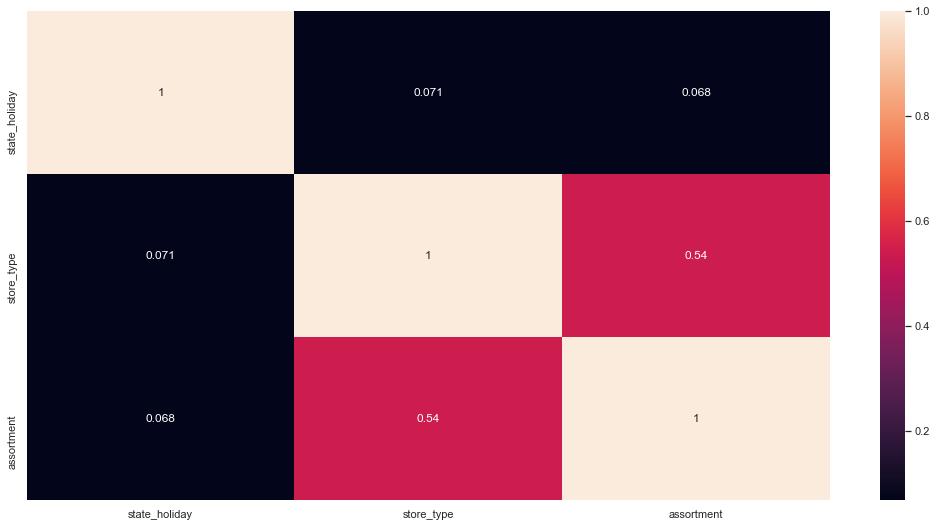

In [300]:
sns.heatmap (d, annot=True)

Temos acima as correlações entre variáveis categóricas.
Notamos que state_holiday tem correlação média com store_type, pois o